In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            213G     0  213G   0% /dev
tmpfs            43G  4.1G   39G  10% /run
/dev/sda1        62G   32G   31G  51% /
tmpfs           213G  212K  213G   1% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           213G     0  213G   0% /sys/fs/cgroup
/dev/sdb1       851G   75G  733G  10% /mnt
tmpfs            43G  316K   43G   1% /run/user/1000


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import sklearn
from sklearn import metrics
import sklearn.model_selection
import datetime
import time
import os
import math
random.seed(1)
%matplotlib inline

In [3]:
import multiprocessing as mp
mp.cpu_count()

64

In [4]:
# import mine_concept
# import importlib
# from multiprocessing import Pool
# importlib.reload(mine_concept)

In [5]:
DATA_FOLDER = 'CreditScoring-master'

In [6]:
TARGET_NAME = 'Status'

df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train.csv'), index_col=0)
df_test = pd.read_csv(os.path.join(DATA_FOLDER, 'df_test.csv'), index_col=0)

In [7]:
for col in df_train.columns:
    col, df_train[col].value_counts()

('Status', 1    2256
 2     862
 0       1
 Name: Status, dtype: int64)

('Seniority', 0     379
 1     362
 2     312
 3     226
 5     200
 10    171
 4     165
 6     133
 15    120
 8     117
 20     99
 12     89
 7      86
 14     73
 11     70
 13     65
 9      56
 16     45
 25     44
 18     42
 17     38
 30     36
 19     28
 22     26
 23     20
 24     14
 21     14
 28     11
 26     10
 27     10
 40      9
 31      9
 35      7
 29      7
 32      6
 33      4
 36      3
 38      3
 37      3
 43      1
 48      1
 42      1
 41      1
 45      1
 39      1
 47      1
 Name: Seniority, dtype: int64)

('Home', 2    1467
 1     674
 5     553
 6     241
 3     167
 4      14
 0       3
 Name: Home, dtype: int64)

('Time', 60    1333
 36     659
 48     606
 24     259
 12     105
 18      60
 30      40
 6       24
 42      22
 54      10
 72       1
 Name: Time, dtype: int64)

('Age', 28    116
 27    114
 32    113
 30    112
 24    111
 34    109
 37    107
 26    106
 36    104
 31    100
 40     97
 29     95
 23     92
 38     91
 25     90
 39     89
 35     89
 33     89
 41     84
 22     82
 42     73
 43     69
 46     69
 49     65
 45     63
 47     61
 51     60
 50     56
 52     55
 21     53
 44     52
 53     48
 55     46
 48     45
 54     40
 20     36
 56     33
 58     31
 60     28
 61     24
 59     23
 19     21
 57     19
 62     15
 64     12
 63     10
 65      8
 66      7
 18      6
 68      1
 Name: Age, dtype: int64)

('Marital', 2    2256
 1     693
 4      83
 3      58
 5      29
 Name: Marital, dtype: int64)

('Records', 1    2560
 2     559
 Name: Records, dtype: int64)

('Job', 1    1940
 3     730
 2     324
 4     125
 Name: Job, dtype: int64)

('Expenses', 35     866
 45     579
 60     535
 75     406
 90     139
 105     23
 47      22
 57      19
 54      18
 46      18
 70      17
 74      15
 53      14
 58      14
 42      14
 50      14
 44      13
 66      13
 55      13
 59      13
 56      13
 85      12
 43      12
 49      11
 51      11
 52      11
 82      11
 41      10
 77      10
 88       9
       ... 
 113      4
 40       3
 83       3
 64       3
 92       3
 101      3
 102      2
 98       2
 110      2
 38       2
 173      1
 104      1
 180      1
 131      1
 119      1
 115      1
 109      1
 107      1
 39       1
 37       1
 153      1
 106      1
 150      1
 140      1
 130      1
 126      1
 118      1
 114      1
 112      1
 168      1
 Name: Expenses, Length: 90, dtype: int64)

('Income', 0           237
 100         107
 120          83
 150          79
 110          62
 80           62
 90           55
 125          48
 140          48
 130          47
 70           46
 60           46
 160          46
 200          46
 250          40
 105          35
 115          33
 95           30
 75           29
 85           28
 92           27
 170          26
 180          26
 99999999     26
 300          25
 135          25
 145          25
 50           25
 107          24
 128          20
            ... 
 390           1
 384           1
 359           1
 355           1
 196           1
 345           1
 206           1
 226           1
 232           1
 234           1
 248           1
 341           1
 256           1
 264           1
 266           1
 276           1
 288           1
 292           1
 294           1
 296           1
 306           1
 310           1
 312           1
 346           1
 352           1
 356           1
 360           1
 364

('Assets', 0           1130
 4000         231
 5000         196
 3000         189
 3500         137
 6000         116
 8000          99
 10000         93
 7000          84
 2500          77
 2000          73
 4500          57
 15000         49
 12000         41
 99999999      36
 9000          35
 20000         30
 5500          28
 1500          24
 14000         21
 25000         21
 18000         18
 30000         18
 6500          18
 7500          18
 16000         16
 13000         13
 11000         13
 8500          11
 17000         10
             ... 
 11900          1
 3750           1
 53000          1
 3850           1
 16200          1
 4030           1
 44000          1
 7100           1
 13600          1
 875            1
 1434           1
 110000         1
 1600           1
 59000          1
 1750           1
 2100           1
 6200           1
 6300           1
 2250           1
 31000          1
 47500          1
 14800          1
 150000         1
 2600           1


('Debt', 0           2574
 1500          40
 2000          36
 3000          34
 1000          23
 2500          19
 1200          16
 200           16
 500           15
 400           15
 300           14
 99999999      13
 900           11
 800           11
 4000          10
 600           10
 700           10
 1700           9
 5000           8
 4500           8
 3500           7
 350            7
 1300           7
 1800           7
 1600           6
 100            6
 1100           5
 50             5
 2800           5
 2400           5
             ... 
 1728           1
 1750           1
 2100           1
 45             1
 6000           1
 1950           1
 1978           1
 1980           1
 325            1
 1250           1
 39             1
 6500           1
 672            1
 991            1
 23500          1
 933            1
 2880           1
 770            1
 792            1
 2850           1
 15000          1
 870            1
 2520           1
 960            1
 4

('Amount', 1000    367
 1500    155
 1100    154
 800     148
 1200    146
 1300    138
 600     134
 900     132
 500     129
 700     118
 1400    109
 400      79
 1250     61
 1350     57
 1150     56
 850      55
 1600     53
 750      51
 2000     48
 950      47
 650      46
 300      39
 1450     36
 1800     36
 1700     35
 450      35
 1050     34
 200      31
 250      26
 350      26
        ... 
 983       1
 1126      1
 1460      1
 1120      1
 2380      1
 1078      1
 1035      1
 1055      1
 1065      1
 1048      1
 949       1
 1270      1
 1298      1
 943       1
 1442      1
 1440      1
 1426      1
 1897      1
 887       1
 1390      1
 1380      1
 915       1
 933       1
 1332      1
 1330      1
 1320      1
 1318      1
 1310      1
 1308      1
 1033      1
 Name: Amount, Length: 246, dtype: int64)

('Price', 1200    35
 1600    31
 1500    30
 1400    29
 1700    28
 1300    28
 1100    26
 950     22
 550     22
 1350    22
 800     21
 1000    19
 1150    19
 850     18
 1800    18
 1250    17
 1850    17
 700     16
 1450    16
 650     16
 975     16
 750     16
 500     15
 1650    14
 600     14
 400     13
 450     12
 1550    12
 900     12
 875     11
         ..
 2216     1
 2212     1
 2206     1
 2202     1
 2194     1
 2354     1
 2360     1
 2362     1
 2440     1
 2504     1
 2502     1
 5000     1
 435      1
 2478     1
 2472     1
 2468     1
 2460     1
 2448     1
 2438     1
 6468     1
 2436     1
 2432     1
 2428     1
 2420     1
 2414     1
 365      1
 363      1
 6500     1
 355      1
 4100     1
 Name: Price, Length: 1226, dtype: int64)

In [8]:
categ_features = ['Home', 'Marital', 'Job']

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(df_train[categ_features])

df_train_categ = pd.DataFrame(ohe.transform(df_train[categ_features])).astype(int)
df_test_categ = pd.DataFrame(ohe.transform(df_test[categ_features])).astype(int)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [10]:
df_train_categ.columns

RangeIndex(start=0, stop=16, step=1)

In [11]:
for i in range(16):
    df_train[i] = df_train_categ.values.astype(int)[:,i]
    df_test[i] = df_test_categ.values.astype(int)[:,i]

In [12]:
df_train.drop(categ_features, axis=1, inplace=True)
df_test.drop(categ_features, axis=1, inplace=True)

In [13]:
df_train.loc[(df_train['Income'] == 0) | (df_train['Income'] == 99999999), 'Income'] = np.nan
df_train.loc[(df_train['Assets'] == 99999999), 'Assets'] = np.nan
df_train.loc[(df_train['Debt'] == 99999999), 'Debt'] = np.nan

df_test.loc[(df_test['Income'] == 0) | (df_test['Income'] == 99999999), 'Income'] = np.nan
df_test.loc[(df_test['Assets'] == 99999999), 'Assets'] = np.nan
df_test.loc[(df_test['Debt'] == 99999999), 'Debt'] = np.nan

In [14]:
df_train = df_train.query(TARGET_NAME + "!= 0")
df_test = df_test.query(TARGET_NAME + "!= 0")

df_train[TARGET_NAME] = df_train[TARGET_NAME].replace({1:0, 2:1})
df_test[TARGET_NAME] = df_test[TARGET_NAME].replace({1:0, 2:1})

y_train = df_train[TARGET_NAME]
y_test = df_test[TARGET_NAME]

df_train_pos = df_train[df_train[TARGET_NAME]==1].drop(TARGET_NAME,axis=1)
df_train_neg = df_train[df_train[TARGET_NAME]==0].drop(TARGET_NAME,axis=1)

df_train_pos.head()

,Seniority,Time,Age,Records,Expenses,Income,Assets,Debt,Amount,Price,...,6,7,8,9,10,11,12,13,14,15
2,10,36,46,2,90,200.0,3000.0,0.0,2000,2985,...,0,0,1,0,0,0,0,0,1,0
9,0,48,41,1,90,80.0,0.0,0.0,1200,1468,...,0,0,1,0,0,0,0,1,0,0
18,0,48,36,1,45,130.0,750.0,0.0,1100,1511,...,0,0,1,0,0,0,0,1,0,0
20,2,60,25,1,46,107.0,0.0,0.0,1500,2189,...,0,1,0,0,0,0,1,0,0,0
22,1,60,45,1,105,112.0,2000.0,500.0,600,1332,...,0,0,1,0,0,0,0,1,0,0


In [15]:
df_train.shape
df_test.shape

(3118, 27)

(1336, 27)

In [16]:
df_train = df_train.drop(TARGET_NAME,axis=1)
df_test = df_test.drop(TARGET_NAME,axis=1)

In [17]:
df_train_pos.to_csv(os.path.join(DATA_FOLDER, 'df_train_pos.csv'))
df_train_neg.to_csv(os.path.join(DATA_FOLDER, 'df_train_neg.csv'))

In [18]:
df_train_pos = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train_pos.csv'),index_col=0)
df_train_neg = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train_neg.csv'),index_col=0)

In [19]:
df_train_pos.head()

,Seniority,Time,Age,Records,Expenses,Income,Assets,Debt,Amount,Price,...,6,7,8,9,10,11,12,13,14,15
2,10,36,46,2,90,200.0,3000.0,0.0,2000,2985,...,0,0,1,0,0,0,0,0,1,0
9,0,48,41,1,90,80.0,0.0,0.0,1200,1468,...,0,0,1,0,0,0,0,1,0,0
18,0,48,36,1,45,130.0,750.0,0.0,1100,1511,...,0,0,1,0,0,0,0,1,0,0
20,2,60,25,1,46,107.0,0.0,0.0,1500,2189,...,0,1,0,0,0,0,1,0,0,0
22,1,60,45,1,105,112.0,2000.0,500.0,600,1332,...,0,0,1,0,0,0,0,1,0,0


In [20]:
df_train_neg.shape

(2256, 26)

In [21]:
X_pos = df_train_pos.values
X_neg = df_train_neg.values
X_test = df_test.values

In [22]:
X_test.shape

(1336, 26)

### PatternStructuresMiner

In [113]:
def nunique_percol_sort(a):
    """Number of unique values in a row of array"""
    b = np.sort(a,axis=1)
    return (b[:,1:] != b[:,:-1]).sum(axis=1)+1

class PatternStructuresMiner():
    """
    Basic class to explore intersections of objects and build hypotheses
    """
    def __init__(self, data_pos, data_neg, feature_list):
        """
        :param data_pos: Pandas.DataFrame with objects from class 1
        :param data_neg: Pandas.DataFrame with objects from class 0
        :param feature_list: list of column names used as features
        """
        self.data_pos = data_pos[feature_list]
        self.data_neg = data_neg[feature_list]
        self.X_pos_expanded = np.expand_dims(self.data_pos.values, 0)
        self.X_neg_expanded = np.expand_dims(self.data_neg.values, 0)
        self.feature_list = feature_list
        self.is_nan_X_pos_expanded = np.isnan(self.X_pos_expanded)
        self.is_nan_X_neg_expanded = np.isnan(self.X_neg_expanded)
    
    def mine_obj_intersections(self, n_obj, subs_size, concepts_type):
        # np.random.choice is too slow
        print("Mining {} intersections".format(n_obj))
        data = self.data_pos if concepts_type == 'pos' else self.data_neg
        indexes = np.random.randint(0, data.shape[0], size=(n_obj, subs_size))

        # provide objects in subsamples are unique
        n_unique = nunique_percol_sort(indexes)
        indexes = indexes[n_unique == subs_size]
        
        # left & right borders of interval pattern structures
        concepts_min = np.expand_dims(np.nanmin(data.values[indexes], axis=1), 1)
        concepts_max = np.expand_dims(np.nanmax(data.values[indexes], axis=1), 1)

        # 
        num_neg_objs_in_concepts = ((((concepts_min <= self.X_neg_expanded) | np.isnan(concepts_min)) & 
                                    ((concepts_max >= self.X_neg_expanded) | np.isnan(concepts_max))) | 
                                    self.is_nan_X_neg_expanded).all(axis=2).sum(axis=1)
        num_pos_objs_in_concepts = ((((concepts_min <= self.X_pos_expanded) | np.isnan(concepts_min)) & 
                                    ((concepts_max >= self.X_pos_expanded) | np.isnan(concepts_max))) | 
                                    self.is_nan_X_pos_expanded).all(axis=2).sum(axis=1)
        
        # stats
        pos_support = num_pos_objs_in_concepts / self.data_pos.shape[0]
        neg_support = num_neg_objs_in_concepts / self.data_neg.shape[0]
        pos_confidence = num_pos_objs_in_concepts / (num_pos_objs_in_concepts + num_neg_objs_in_concepts) 
        neg_confidence = num_neg_objs_in_concepts / (num_pos_objs_in_concepts + num_neg_objs_in_concepts) 
        
#         print("Mining obj Finished")
        return concepts_min[:,0,:], concepts_max[:,0,:], \
                pd.DataFrame({'N_pos_in_concepts':num_pos_objs_in_concepts,
                              'N_neg_in_concepts':num_neg_objs_in_concepts,
                              'concepts_type':[concepts_type]*num_pos_objs_in_concepts.shape[0],
                              'subs_size':[subs_size]*num_pos_objs_in_concepts.shape[0],
                              'N_pos_all':[self.data_pos.shape[0]]*num_pos_objs_in_concepts.shape[0],
                              'N_neg_all':[self.data_neg.shape[0]]*num_pos_objs_in_concepts.shape[0],
                              'pos_support' : pos_support,
                              'neg_support' : neg_support,
                              'pos_confidence' : pos_confidence,
                              'neg_confidence' : neg_confidence
                               })
    
    
    def mine_hypotheses(self, alpha, hypo_type, subs_size,
                      N_hypo_need = None, N_iterations = None, batch_size = 1000, save_path = None):
        N_mined_hypo = 0
        hypotheses_min_LIST = []
        hypotheses_max_LIST = []
        iter_total = 0
        
        while N_mined_hypo < N_hypo_need:
            concepts_min, concepts_max, stats_concepts = self.mine_obj_intersections(batch_size, subs_size, hypo_type)
            good_hypos_idxs = stats_concepts.query(hypo_type + "_confidence >= " + str(alpha)).index
            hypotheses_min_LIST.append(concepts_min[good_hypos_idxs])
            hypotheses_max_LIST.append(concepts_max[good_hypos_idxs])
            N_mined_hypo += good_hypos_idxs.shape[0]
            print("N_mined_hypos of type " + hypo_type, N_mined_hypo)
            iter_total += batch_size
            if N_iterations and iter_total >= N_iterations:
                break
            
        hypotheses_min = np.concatenate(hypotheses_min_LIST)
        hypotheses_max = np.concatenate(hypotheses_max_LIST)
        if N_hypo_need:
            hypotheses_min = hypotheses_min[:N_hypo_need]
            hypotheses_max = hypotheses_max[:N_hypo_need]
        
        if save_path:
            pd.DataFrame(hypotheses_min).to_csv(os.path.join(save_path, "hypotheses_min.csv"), header=None, index=None)
            pd.DataFrame(hypotheses_max).to_csv(os.path.join(save_path, "hypotheses_max.csv"), header=None, index=None)
        
        return hypotheses_min, hypotheses_max
        


In [114]:
features = ['Seniority', 'Time', 'Age', 'Records',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] + list(map(str,range(16)))

In [115]:
%%time
PSM = PatternStructuresMiner(df_train_pos, df_train_neg, features)

CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 3.02 ms


In [116]:
# %%time
# _, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 3, 'pos')
# _, _, stats_concepts_neg = PSM.mine_obj_intersections(10000, 3, 'neg')

In [117]:
# import shutil
# folder = 'CreditScoring-master/Hypotheses'
# shutil.rmtree(folder)
# os.mkdir(folder)

### Mine positive hypotheses

Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


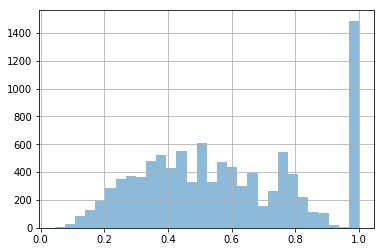

In [120]:
_, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 3, 'pos')
stats_concepts_pos['pos_confidence'].hist(alpha = 0.5, bins = 30)

In [48]:
np.linspace(0,1,51)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [ ]:
%%time
from sklearn.model_selection import ParameterGrid
import multiprocessing

param_grid = {
    'subs_size': list(range(2,12)),
    'alpha': np.linspace(0,1,51), 
    'hypo_type' : ['pos'],
    'N_hypo_need' : [3000],
    'N_iterations' : [300000],
    'batch_size' : [10000],
}

### WARNING! round(params['alpha'], 4) ---> for readable folder names
MyParamGrid = []
for params in ParameterGrid(param_grid):
    save_path = os.path.join(DATA_FOLDER, 
                             'Hypotheses',
                             params['hypo_type'] + '_' + 
                             str(params['subs_size']) + '_' + 
                             str(round(params['alpha'], 4)))
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    params['save_path'] = save_path
    MyParamGrid.append(params)

pool = multiprocessing.Pool(processes=50) #use all available cores, otherwise specify the number you want as an argument
for args in MyParamGrid:
    pool.apply_async(PSM.mine_hypotheses, args=(args['alpha'],
                                                args['hypo_type'],
                                                args['subs_size'],
                                                args['N_hypo_need'],
                                                args['N_iterations'],
                                                args['batch_size'],
                                                args['save_path'],
                                               ))
pool.close()
pool.join()

Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarni

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-p

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9601


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9499


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9840


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9764


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9681


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9840


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections
N_mined_hypos of type pos 9957


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9984


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9601


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9957


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type pos 9379
N_mined_hypos of type pos 9925


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9499


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9764


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9379


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9601


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9957


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9764
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9379


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9873
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9681
N_mined_hypos of type pos 9928


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9983


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9928


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9681
N_mined_hypos of type pos 9873


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9873
N_mined_hypos of type pos 9928
N_mined_hypos of type pos 9928
Mining 10000 intersections
N_mined_hypos of type pos 9873


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9840
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9499
N_mined_hypos of type pos 9601
Mining 10000 intersections
N_mined_hypos of type pos 9681
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9840
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type pos 9764
Mining 10000 intersections
N_mined_hypos of type pos 9764


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9379
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9840


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9681
N_mined_hypos of type pos 9984
N_mined_hypos of type pos 9601
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type pos 9499
N_mined_hypos of type pos 9956
N_mined_hypos of type pos 9983
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9957
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9873
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 9984


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9499
N_mined_hypos of type pos 9379
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9408
N_mined_hypos of type pos 9885
Mining 10000 intersections
N_mined_hypos of type pos 9805
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9921
N_mined_hypos of type pos 9978
N_mined_hypos of type pos 9411
N_mined_hypos of type pos 9627
N_mined_hypos of type pos 9877
N_mined_hypos of type pos 9499
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9678
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9754
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9818


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9948
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9579
N_mined_hypos of type pos 9753
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9816
Mining 10000 intersections
N_mined_hypos of type pos 9985
N_mined_hypos of type pos 9905
Mining 10000 intersections
N_mined_hypos of type pos 9380
N_mined_hypos of type pos 9890
Mining 10000 intersections
N_mined_hypos of type pos 9397
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9718
N_mined_hypos of type pos 9411
N_mined_hypos of type pos 9764
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9822
N_mined_hypos of type pos 9662
N_mined_hypos of type pos 9502
Mining 10000 intersections
N_mined_hypos of type pos 9698
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9734
N_mined_hypos of type pos 9972
N_mined_hypos of type pos 9943
Mining 10000 intersections
N_mined_hypos of type pos 9857
N_mined_hypos of type pos 9570
N_mined_hypos of type pos 9491
N_mined_hypos of type pos 9712
N_mined_hypos of type pos 9593
Mining 10000 intersections
N_mined_hypos of type pos 9783
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9787


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 9623
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9658
N_mined_hypos of type pos 9672
Mining 10000 intersections
N_mined_hypos of type pos 9735
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9718
N_mined_hypos of type pos 9552
Mining 10000 intersections
N_mined_hypos of type pos 9547
Mining 10000 intersections
N_mined_hypos of type pos 9633
N_mined_hypos of type pos 9524
Mining 10000 intersections
N_mined_hypos of type pos 9939
Mining 10000 intersections
N_mined_hypos of type pos 9508
Mining 10000 intersections
N_mined_hypos of type pos 9575
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9624
N_mined_hypos of type pos 9496
Mining 10000 intersections
N_mined_hypos of type pos 9480
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9558
Mining 10000 intersections
N_mined_hypos of type pos 9440
Mining 10000 intersections
N_mined_hypos of type pos 9529
N_mined_hypos of type pos 9362
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9336
Mining 10000 intersections
N_mined_hypos of type pos 9120
Mining 10000 intersections
N_mined_hypos of type pos 9394
N_mined_hypos of type pos 9268
N_mined_hypos of type pos 9946
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9329
N_mined_hypos of type pos 9032
N_mined_hypos of type pos 9904
N_mined_hypos of type pos 9007
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9362
Mining 10000 intersections
N_mined_hypos of type pos 9885
N_mined_hypos of type pos 9032
N_mined_hypos of type pos 8941
Mining 10000 intersections
N_mined_hypos of type pos 9295
N_mined_hy

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 8710


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9343
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 8258
N_mined_hypos of type pos 8753
Mining 10000 intersections
N_mined_hypos of type pos 7213
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 7221
N_mined_hypos of type pos 9208
N_mined_hypos of type pos 8054
N_mined_hypos of type pos 9824
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9813
N_mined_hypos of type pos 7548
Mining 10000 intersections
N_mined_hypos of type pos 8343
Mining 10000 intersections
N_mined_hypos of type pos 8737
N_mined_hypos of type pos 6980
N_mined_hypos of type pos 8901
N_mined_hypos of type pos 7194
N_mined_hypos of type pos 8302
N_mined_hypos of type pos 8979
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9784
N_mined_hypos 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 5199
N_mined_hypos of type pos 9678
N_mined_hypos of type pos 8548
Mining 10000 intersections
N_mined_hypos of type pos 5945
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 6088
N_mined_hypos of type pos 4339
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 3693
N_mined_hypos of type pos 6581
Mining 10000 intersections
N_mined_hypos of type pos 4183
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 4850
Mining 10000 intersections
N_mined_hypos of type pos 3431
N_mined_hypos of type pos 3046
Mining 10000 intersections
N_mined_hypos of type pos 7015
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 5623
N_mined_hypos of type pos 5857
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 7992
N_mined_hypos of type pos 4651
Mining 10000 intersections
N_mined_hypos of type pos 4345
N_mined_hy

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 1527
Mining 10000 intersections
N_mined_hypos of type pos 2350
Mining 10000 intersections
N_mined_hypos of type pos 1096
Mining 10000 intersections
N_mined_hypos of type pos 3260
N_mined_hypos of type pos 111
Mining 10000 intersections
N_mined_hypos of type pos 776
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9331
N_mined_hypos of type pos 2993
Mining 10000 intersections
N_mined_hypos of type pos 819
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 5826
N_mined_hypos of type pos 1011
Mining 10000 intersections
N_mined_hypos of type pos 2571
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 207
Mining 10000 intersections
N_mined_hypos of type pos 91
Mining 10000 intersections
N_mined_hypos of type pos 1706
Mining 10000 intersections
N_mined_hypos of type pos 3774
N_mined_hypos of type pos 3595
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of typ

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 2492
Mining 10000 intersections
N_mined_hypos of type pos 3684
N_mined_hypos of type pos 253
Mining 10000 intersections
N_mined_hypos of type pos 209
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 5083
N_mined_hypos of type pos 620
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 8916
N_mined_hypos of type pos 19
Mining 10000 intersections
N_mined_hypos of type pos 99
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1013
Mining 10000 intersections
N_mined_hypos of type pos 42
Mining 10000 intersections
N_mined_hypos of type pos 204
Mining 10000 intersections
N_mined_hypos of type pos 6017
N_mined_hypos of type pos 2296
Mining 10000 intersections
N_mined_hypos of type pos 2177
Mining 10000 intersections
N_mined_hypos of type pos 188
Mining 10000 intersections
N_mined_hypos of type pos 1209
Mining 10000 intersections
N_mined_hypos of type pos 1578
Mining 10000 intersec

Mining 10000 intersections
N_mined_hypos of type pos 2043
Mining 10000 intersections
N_mined_hypos of type pos 43
N_mined_hypos of type pos 196
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 4484
N_mined_hypos of type pos 565
Mining 10000 intersections
N_mined_hypos of type pos 57
Mining 10000 intersections
N_mined_hypos of type pos 2564
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1
Mining 10000 intersections
N_mined_hypos of type pos 2865
Mining 10000 intersections
N_mined_hypos of type pos 8923
Mining 10000 intersections
N_mined_hypos of type pos 2430
Mining 10000 intersections
N_mined_hypos of type pos 760
Mining 10000 intersections
N_mined_hypos of type pos 109
Mining 10000 intersections
N_mined_hypos of type pos 2550
Mining 10000 intersections
N_mined_hypos of type pos 487
Mining 10000 intersections
N_mined_hypos of type pos 1492
Mining 10000 intersections
N_mined_hypos of type pos 139
Mining 10000 intersections


N_mined_hypos of type pos 451
Mining 10000 intersections
N_mined_hypos of type pos 1
Mining 10000 intersections
N_mined_hypos of type pos 11
Mining 10000 intersections
N_mined_hypos of type pos 347
Mining 10000 intersections
N_mined_hypos of type pos 33
Mining 10000 intersections
N_mined_hypos of type pos 3323
N_mined_hypos of type pos 2085
Mining 10000 intersections
N_mined_hypos of type pos 139
Mining 10000 intersections
N_mined_hypos of type pos 1340
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9
Mining 10000 intersections
N_mined_hypos of type pos 1960
Mining 10000 intersections
N_mined_hypos of type pos 4
Mining 10000 intersections
N_mined_hypos of type pos 172
Mining 10000 intersections
N_mined_hypos of type pos 2254
Mining 10000 intersections
N_mined_hypos of type pos 83
Mining 10000 intersections
N_mined_hypos of type pos 1025
Mining 10000 intersections
N_mined_hypos of type pos 36
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 

Mining 10000 intersections
N_mined_hypos of type pos 326
Mining 10000 intersections
N_mined_hypos of type pos 114
Mining 10000 intersections
N_mined_hypos of type pos 11
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 43
Mining 10000 intersections
N_mined_hypos of type pos 3464
Mining 10000 intersections
N_mined_hypos of type pos 1060
Mining 10000 intersections
N_mined_hypos of type pos 1892
Mining 10000 intersections
N_mined_hypos of type pos 689
Mining 10000 intersections
N_mined_hypos of type pos 2022
Mining 10000 intersections
N_mined_hypos of type pos 2777
Mining 10000 intersections
N_mined_hypos of type pos 450
Mining 10000 intersections
N_mined_hypos of type pos 2
Mining 10000 intersections
N_mined_hypos of type pos 29
Mining 10000 intersections
N_mined_hypos of type pos 603
Mining 10000 intersections
N_mined_hypos of type pos 178
Mining 10000 intersections
N_mined_hypos of type pos 2816
Mining 10000 intersections
N_mined_hypos of type pos 3270
N_

N_mined_hypos of type pos 2564
Mining 10000 intersections
N_mined_hypos of type pos 338
Mining 10000 intersections
N_mined_hypos of type pos 3068
N_mined_hypos of type pos 24
Mining 10000 intersections
N_mined_hypos of type pos 1003
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1110
N_mined_hypos of type pos 81
N_mined_hypos of type pos 1232
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 8
Mining 10000 intersections
N_mined_hypos of type pos 14
Mining 10000 intersections
N_mined_hypos of type pos 47
Mining 10000 intersections
N_mined_hypos of type pos 351
Mining 10000 intersections
N_mined_hypos of type pos 757
Mining 10000 intersections
N_mined_hypos of type pos 1052
Mining 10000 intersections
N_mined_hypos of type pos 1834
Mining 10000 intersections
N_mined_hypos of type pos 673
Mining 10000 intersections
N_mined_hypos of type pos 2604
M

Mining 10000 intersections
N_mined_hypos of type pos 175
Mining 10000 intersections
N_mined_hypos of type pos 170
Mining 10000 intersections
N_mined_hypos of type pos 95
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 2662
Mining 10000 intersections
N_mined_hypos of type pos 430
Mining 10000 intersections
N_mined_hypos of type pos 43
Mining 10000 intersections
N_mined_hypos of type pos 1843
Mining 10000 intersections
N_mined_hypos of type pos 165
Mining 10000 intersections
N_mined_hypos of type pos 31
Mining 10000 intersections
N_mined_hypos of type pos 665
Mining 10000 intersections
N_mined_hypos of type pos 3
Mining 10000 intersections
N_mined_hypos of type pos 415
Mining 10000 intersections
N_mined_hypos of type pos 217
Mining 10000 intersections
N_mined_hypos of type pos 1510
Mining 10000 intersections
N_mined_hypos of type pos 76
Mining 10000 intersections
N_mined_hypos of type pos 34
Mining 10000 intersections
N_mined_hy

Mining 10000 intersections
N_mined_hypos of type pos 7910
N_mined_hypos of type pos 41
Mining 10000 intersections
N_mined_hypos of type pos 1411
Mining 10000 intersections
N_mined_hypos of type pos 15
Mining 10000 intersections
N_mined_hypos of type pos 54
Mining 10000 intersections
N_mined_hypos of type pos 19
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 2281
N_mined_hypos of type pos 114
Mining 10000 intersections
N_mined_hypos of type pos 5
N_mined_hypos of type pos 221
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 2514
Mining 10000 intersections
N_mined_hypos of type pos 569
Mining 10000 intersections
N_mined_hypos of type pos 57
Mining 10000 intersections
N_mined_hypos of type pos 1774
N_mined_hypos of type pos 1121
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1671
Mining 10000 intersections
N_mined_hypos of type pos 1795
Mining 10000 intersections
N_m

N_mined_hypos of type pos 2933
Mining 10000 intersections
N_mined_hypos of type pos 2294
Mining 10000 intersections
N_mined_hypos of type pos 296
Mining 10000 intersections
N_mined_hypos of type pos 85
Mining 10000 intersections
N_mined_hypos of type pos 53
Mining 10000 intersections
N_mined_hypos of type pos 2205
Mining 10000 intersections
N_mined_hypos of type pos 1225
Mining 10000 intersections
N_mined_hypos of type pos 1151
Mining 10000 intersections
N_mined_hypos of type pos 373
Mining 10000 intersections
N_mined_hypos of type pos 1
Mining 10000 intersections
N_mined_hypos of type pos 9
Mining 10000 intersections
N_mined_hypos of type pos 492
Mining 10000 intersections
N_mined_hypos of type pos 23
Mining 10000 intersections
N_mined_hypos of type pos 1688
Mining 10000 intersections
N_mined_hypos of type pos 2893
Mining 10000 intersections
N_mined_hypos of type pos 55
Mining 10000 intersections
N_mined_hypos of type pos 24
Mining 10000 intersections
N_mined_hypos of type pos 1109
Mi

Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 2256
Mining 10000 intersections
N_mined_hypos of type pos 8
Mining 10000 intersections
N_mined_hypos of type pos 132
Mining 10000 intersections
N_mined_hypos of type pos 71
Mining 10000 intersections
N_mined_hypos of type pos 7
Mining 10000 intersections
N_mined_hypos of type pos 6
Mining 10000 intersections
N_mined_hypos of type pos 31
Mining 10000 intersections
N_mined_hypos of type pos 342
Mining 10000 intersections
N_mined_hypos of type pos 1307
Mining 10000 intersections
N_mined_hypos of type pos 4
Mining 10000 intersections
N_mined_hypos of type pos 12
Mining 10000 intersections
N_mined_hypos of type pos 138
Mining 10000 intersections
N_mined_hypos of type pos 41
Mining 10000 intersections
N_mined_hypos of type pos 1245
Mining 10000 intersections
N_mined_hypos of type pos 869
Mining 10000 intersections
N_mined_hypos of type pos 62
Mining 10000 intersections
N_mined_hypos of type pos 280
Mining 10000 i

Mining 10000 intersections
N_mined_hypos of type pos 79
Mining 10000 intersections
N_mined_hypos of type pos 8
Mining 10000 intersections
N_mined_hypos of type pos 897
Mining 10000 intersections
N_mined_hypos of type pos 560
Mining 10000 intersections
N_mined_hypos of type pos 69
Mining 10000 intersections
N_mined_hypos of type pos 2123
Mining 10000 intersections
N_mined_hypos of type pos 34
Mining 10000 intersections
N_mined_hypos of type pos 57
Mining 10000 intersections
N_mined_hypos of type pos 1611
Mining 10000 intersections
N_mined_hypos of type pos 92
Mining 10000 intersections
N_mined_hypos of type pos 724
Mining 10000 intersections
N_mined_hypos of type pos 5
Mining 10000 intersections
N_mined_hypos of type pos 15
Mining 10000 intersections
N_mined_hypos of type pos 2
Mining 10000 intersections
N_mined_hypos of type pos 1680
Mining 10000 intersections
N_mined_hypos of type pos 135
Mining 10000 intersections
N_mined_hypos of type pos 253
Mining 10000 intersections
N_mined_hypos

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 1985
Mining 10000 intersections
N_mined_hypos of type pos 9
Mining 10000 intersections
N_mined_hypos of type pos 408
Mining 10000 intersections
N_mined_hypos of type pos 38
Mining 10000 intersections
N_mined_hypos of type pos 75
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 1547
Mining 10000 intersections
N_mined_hypos of type pos 610
Mining 10000 intersections
N_mined_hypos of type pos 39
Mining 10000 intersections
N_mined_hypos of type pos 90
Mining 10000 intersections
N_mined_hypos of type pos 2752
Mining 10000 intersections
N_mined_hypos of type pos 2
Mining 10000 intersections
N_mined_hypos of type pos 35
Mining 10000 intersections
N_mined_hypos of type pos 15
N_mined_hypos of type pos 143
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 2855
Mining 10000 intersections
N_mined_hypos of type pos 550
Mining 10000 intersections
N_mined_hypos of type pos 68
Mining 100

N_mined_hypos of type pos 3
Mining 10000 intersections
N_mined_hypos of type pos 3
Mining 10000 intersections
N_mined_hypos of type pos 1518
Mining 10000 intersections
N_mined_hypos of type pos 339
Mining 10000 intersections
N_mined_hypos of type pos 24
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 292
Mining 10000 intersections
N_mined_hypos of type pos 23
Mining 10000 intersections
N_mined_hypos of type pos 2324
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1733
Mining 10000 intersections
N_mined_hypos of type pos 112
Mining 10000 intersections
N_mined_hypos of type pos 4
Mining 10000 intersections
N_mined_hypos of type pos 700
Mining 10000 intersections
N_mined_hypos of type pos 22
Mining 10000 intersections
N_mined_hypos of type pos 23
Mining 10000 int

### Mine negative hypotheses

In [ ]:
_, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 100, 'neg')
stats_concepts_pos['neg_confidence'].hist(alpha = 0.5, bins = 30)

In [58]:
'alpha', np.linspace(0.5,1,51)

('alpha',
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ]))

In [ ]:
%%time
from sklearn.model_selection import ParameterGrid
import multiprocessing

param_grid = {
    'subs_size': list(range(2,21)),
    'alpha': np.linspace(0.5,1,51), 
    'hypo_type' : ['neg'],
    'N_hypo_need' : [3000],
    'N_iterations' : [300000],
    'batch_size' : [10000],
}

### WARNING! round(params['alpha'], 4) ---> for readable folder names
MyParamGrid = []
for params in ParameterGrid(param_grid):
    save_path = os.path.join(DATA_FOLDER, 
                             'Hypotheses',
                             params['hypo_type'] + '_' + 
                             str(params['subs_size']) + '_' + 
                             str(round(params['alpha'], 4)))
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    params['save_path'] = save_path
    MyParamGrid.append(params)


pool = multiprocessing.Pool(processes=50) #use all available cores, otherwise specify the number you want as an argument
for args in MyParamGrid:
    pool.apply_async(PSM.mine_hypotheses, args=(args['alpha'],
                                                args['hypo_type'],
                                                args['subs_size'],
                                                args['N_hypo_need'],
                                                args['N_iterations'],
                                                args['batch_size'],
                                                args['save_path'],
                                               ))
pool.close()
pool.join()

### PatternStructuresClassifier

In [63]:
class PatternStructuresClassifier():
    """
    Classifier turns hypotheses given test objects into classifiers
    """
    def __init__(self, data_pos, data_neg, feature_list):
        """
        :param data_pos: Pandas.DataFrame with objects from class 1
        :param data_neg: Pandas.DataFrame with objects from class 0
        :param feature_list: list of column names used as features
        """
        self.data_pos = data_pos[feature_list]
        self.data_neg = data_neg[feature_list]
        self.X_pos_expanded = self.data_pos.values[None,:,:]
        self.X_neg_expanded = self.data_neg.values[None,:,:]
        self.feature_list = feature_list
        self.is_nan_X_pos_expanded = np.isnan(self.X_pos_expanded)
        self.is_nan_X_neg_expanded = np.isnan(self.X_neg_expanded)
        
    def classify_test_objects(self, X_test, hypotheses_min, hypotheses_max, alpha, 
                              save_scores_file_path=None, print_when_over=False):
        """
        :X_test: Pandas.DataFrame with objects from class 1
        :hypotheses_min: min_bound of hypotheses of shape (n_hypos, n_feat)
        :hypotheses_max: max_bound of hypotheses of shape (n_hypos, n_feat)
        :alpha: list of column names used as features
        :save_scores_file_path: path to FILE with scores for given test objects
        :print_when_over: print a message when completed (useful for parallel computing)
        """
        SCORE_RES = []
        for i in range(X_test.shape[0]):
            test_obj = X_test[[i],:]
#             test_obj = X_test[:,:]

            classifier_min = np.nanmin([np.repeat(test_obj, hypotheses_min.shape[0], axis=0), hypotheses_min], axis=0)[:,None,:]
            classifier_max = np.nanmax([np.repeat(test_obj, hypotheses_max.shape[0], axis=0), hypotheses_max], axis=0)[:,None,:]

            num_POS_objs_in_clfs = ((((classifier_min <= self.X_pos_expanded) | np.isnan(classifier_min)) & 
                                    ((classifier_max >= self.X_pos_expanded) | np.isnan(classifier_max))) | 
                                    self.is_nan_X_pos_expanded).all(axis=-1).sum(axis=-1)
            num_NEG_objs_in_clfs = ((((classifier_min <= self.X_neg_expanded) | np.isnan(classifier_min)) & 
                                    ((classifier_max >= self.X_neg_expanded) | np.isnan(classifier_max))) | 
                                    self.is_nan_X_neg_expanded).all(axis=-1).sum(axis=-1)
            NO_OBJ_IN_CLF = ((num_POS_objs_in_clfs == 0) & (num_NEG_objs_in_clfs == 0)).sum()
            print(NO_OBJ_IN_CLF)
            num_POS_objs_in_clfs[(num_POS_objs_in_clfs == 0) & (num_NEG_objs_in_clfs == 0)] = 1
            POS_confinedce = num_POS_objs_in_clfs / (num_NEG_objs_in_clfs + num_POS_objs_in_clfs)
#             POS_confinedce = POS_confinedce[POS_confinedce == POS_confinedce]
            NEG_confinedce = 1 - POS_confinedce

            POS_alpha_weak_sum = (POS_confinedce >= alpha).sum(axis=-1)
            NEG_alpha_weak_sum = (NEG_confinedce >= alpha).sum(axis=-1)
            POS_alpha_weak_conf_sum = POS_confinedce[POS_confinedce >= alpha].sum(axis=-1)
            NEG_alpha_weak_conf_sum = NEG_confinedce[NEG_confinedce >= alpha].sum(axis=-1)
            
            POS_alpha_weak_mean = (POS_confinedce >= alpha).mean(axis=-1)
            NEG_alpha_weak_mean = (NEG_confinedce >= alpha).mean(axis=-1)
            POS_alpha_weak_conf_mean_alpha = POS_confinedce[POS_confinedce >= alpha].mean(axis=-1)
            NEG_alpha_weak_conf_mean_alpha = NEG_confinedce[NEG_confinedce >= alpha].mean(axis=-1)
            POS_alpha_weak_conf_mean_all = (POS_confinedce*(POS_confinedce >= alpha)).mean(axis=-1)
            NEG_alpha_weak_conf_mean_all = (NEG_confinedce*(NEG_confinedce >= alpha)).mean(axis=-1)


            scores_dict = {
                'num_POS_objs_sum' : num_POS_objs_in_clfs.sum(axis=-1),
                'num_NEG_objs_sum' : num_NEG_objs_in_clfs.sum(axis=-1),
                'POS_confinedce_sum' : POS_confinedce.sum(axis=-1),
                'NEG_confinedce_sum' : NEG_confinedce.sum(axis=-1),
                'num_POS_alpha_weak_sum' : POS_alpha_weak_sum,
                'num_NEG_alpha_weak_sum' : NEG_alpha_weak_sum,
                'POS_alpha_weak_conf_sum' : POS_alpha_weak_conf_sum,
                'NEG_alpha_weak_conf_sum' : NEG_alpha_weak_conf_sum,
                
                'num_POS_objs_mean' : num_POS_objs_in_clfs.mean(axis=-1),
                'num_NEG_objs_mean' : num_NEG_objs_in_clfs.mean(axis=-1),
                'POS_confinedce_mean' : POS_confinedce.mean(axis=-1),
                'NEG_confinedce_mean' : NEG_confinedce.mean(axis=-1),
                'num_POS_alpha_weak_mean' : POS_alpha_weak_mean,
                'num_NEG_alpha_weak_mean' : NEG_alpha_weak_mean,
                'POS_alpha_weak_conf_mean_alpha' : POS_alpha_weak_conf_mean_alpha,
                'NEG_alpha_weak_conf_mean_alpha' : NEG_alpha_weak_conf_mean_alpha,
                'POS_alpha_weak_conf_mean_all' : POS_alpha_weak_conf_mean_all,
                'NEG_alpha_weak_conf_mean_all' : NEG_alpha_weak_conf_mean_all,
                
#                 'num_POS2NEG_clf' : np.divide(num_POS_objs_in_clfs.astype(np.float32), 
#                                        num_NEG_objs_in_clfs.astype(np.float32), 
#                                        out=np.ones_like(num_POS_objs_in_clfs.astype(np.float32))*self.data_pos.shape[0],
#                                        where=num_NEG_objs_in_clfs.astype(np.float32)!=0).sum(axis=-1),
            }
            SCORE_RES.append(scores_dict)
            
        df_test_scores = pd.DataFrame(SCORE_RES)
        if save_scores_file_path:
            df_test_scores.to_csv(save_scores_file_path)
        
        if print_when_over:
            print(hypo_source_path, " is OVER now!!!")
        return df_test_scores

In [64]:
features = ['Seniority', 'Time', 'Age', 'Records',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] + list(map(str,range(16)))

In [65]:
PS_clf = PatternStructuresClassifier(df_train_pos, df_train_neg, features)

#### Parallel through all combinations of Hyperparams

In [71]:
N_HYPO_MAX = 3000
N_PROC = 50

In [72]:
def is_non_zero_file(fpath):
    return True if os.path.isfile(fpath) and os.path.getsize(fpath) > 0 else False

listdir = os.listdir(os.path.join(DATA_FOLDER,'Hypotheses'))
# listdir.remove('.ipynb_checkpoints')
np.random.shuffle(listdir)

MyParamGrid = []
for hypo_source_dir in listdir:
    _, _, alpha = hypo_source_dir.split('_')
    alpha = float(alpha)
    
    hypo_source_path = os.path.join(DATA_FOLDER,'Hypotheses', hypo_source_dir)
    hypo_path_min = os.path.join(hypo_source_path, 'hypotheses_min.csv')
    hypo_path_max = os.path.join(hypo_source_path, 'hypotheses_max.csv')

    if is_non_zero_file(hypo_path_min):
        hypotheses_min = pd.read_csv(hypo_path_min, header=None).values[:N_HYPO_MAX]
        hypotheses_max = pd.read_csv(hypo_path_max, header=None).values[:N_HYPO_MAX]

        args = {
            'X_test':X_test,
            'hypotheses_min':hypotheses_min,
            'hypotheses_max':hypotheses_max,
            'alpha':alpha,
            'save_scores_file_path':os.path.join(hypo_source_path, 'df_test_scores.csv'),
            'print_when_over':True
        }

        MyParamGrid.append(args)
len(MyParamGrid)

1375

#### Parallel through X_test (one set of params)

In [74]:
N_HYPO_MAX = 20000
N_PROC = 50
batch_size = int(np.ceil(X_test.shape[0]/N_PROC))
batch_size

27

In [75]:
def is_non_zero_file(fpath):
    return True if os.path.isfile(fpath) and os.path.getsize(fpath) > 0 else False

listdir = os.listdir(os.path.join(DATA_FOLDER,'Hypotheses'))
# listdir.remove('.ipynb_checkpoints')
np.random.shuffle(listdir)

hypo_source_dir = 'pos_3_0.8'
_, _, alpha = hypo_source_dir.split('_')
alpha = float(alpha)
hypo_source_path = os.path.join(DATA_FOLDER,'Hypotheses', hypo_source_dir)
hypo_path_min = os.path.join(hypo_source_path, 'hypotheses_min.csv')
hypo_path_max = os.path.join(hypo_source_path, 'hypotheses_max.csv')

print("Any hypotheses in there? ", is_non_zero_file(hypo_path_min))

MyParamGrid = []
if is_non_zero_file(hypo_path_min):
    hypotheses_min = pd.read_csv(hypo_path_min, header=None).values[:N_HYPO_MAX]
    hypotheses_max = pd.read_csv(hypo_path_max, header=None).values[:N_HYPO_MAX]
    hypotheses_min.shape, hypotheses_max.shape
    for i in range(N_PROC):
    # for test_obj in X_test[:90]:
        args = {
    #         'X_test':test_obj[None,:],
            'X_test':X_test[batch_size*i:batch_size*(i+1)],
            'hypotheses_min':hypotheses_min,
            'hypotheses_max':hypotheses_max,
            'alpha':alpha,
            'save_scores_file_path':None,
            'print_when_over':False
        }
        MyParamGrid.append(args)

Any hypotheses in there?  True


((3088, 26), (3088, 26))

In [37]:
# N_HYPO_MAX = 20000
# def is_non_zero_file(fpath):
#     return True if os.path.isfile(fpath) and os.path.getsize(fpath) > 0 else False

# listdir = os.listdir(os.path.join(DATA_FOLDER,'Hypotheses'))
# # listdir.remove('.ipynb_checkpoints')
# np.random.shuffle(listdir)

# hypo_source_dir = 'pos_4_0.75'
# _, _, alpha = hypo_source_dir.split('_')
# alpha = float(alpha)
# hypo_source_path = os.path.join(DATA_FOLDER,'Hypotheses', hypo_source_dir)
# hypo_path_min = os.path.join(hypo_source_path, 'hypotheses_min.csv')
# hypo_path_max = os.path.join(hypo_source_path, 'hypotheses_max.csv')

# hypotheses_min = pd.read_csv(hypo_path_min, header=None).values[:N_HYPO_MAX]
# hypotheses_max = pd.read_csv(hypo_path_max, header=None).values[:N_HYPO_MAX]

In [97]:
# param_grid = {
#     'subs_size': 4,
#     'alpha': 0.75, 
#     'hypo_type' : 'pos',
#     'N_hypo_need' : 10000,
#     'N_iterations' : 100000,
#     'batch_size' : 10000,
# }

# hypotheses_min, hypotheses_max = PSM.mine_hypotheses(**param_grid)

In [36]:
# i = 20
# self = PS_clf
# test_obj = X_test[[i],:]
# #             test_obj = X_test[:,:]
# test_obj
# classifier_min = np.nanmin([np.repeat(test_obj, hypotheses_min.shape[0], axis=0), hypotheses_min], axis=0)[:,None,:]
# classifier_max = np.nanmax([np.repeat(test_obj, hypotheses_max.shape[0], axis=0), hypotheses_max], axis=0)[:,None,:]

# hypotheses_min_reshape = hypotheses_min[:,None,:]
# hypotheses_max_reshape = hypotheses_max[:,None,:]
# hypotheses_min.shape
# classifier_min.shape

# num_POS_objs_in_clfs = ((((hypotheses_min_reshape <= self.X_pos_expanded) | np.isnan(hypotheses_min_reshape)) & 
#                         ((hypotheses_max_reshape >= self.X_pos_expanded) | np.isnan(hypotheses_max_reshape))) | 
#                         self.is_nan_X_pos_expanded).all(axis=-1).sum(axis=-1)
# num_NEG_objs_in_clfs = ((((hypotheses_min_reshape <= self.X_neg_expanded) | np.isnan(hypotheses_max_reshape)) & 
#                         ((hypotheses_min_reshape >= self.X_neg_expanded) | np.isnan(hypotheses_max_reshape))) | 
#                         self.is_nan_X_neg_expanded).all(axis=-1).sum(axis=-1)
# NO_OBJ_IN_CLF = ((num_POS_objs_in_clfs == 0) & (num_NEG_objs_in_clfs == 0)).sum()
# NO_OBJ_IN_CLF


# num_POS_objs_in_clfs = ((((classifier_min <= self.X_pos_expanded) | np.isnan(classifier_min)) & 
#                         ((classifier_max >= self.X_pos_expanded) | np.isnan(classifier_max))) | 
#                         self.is_nan_X_pos_expanded).all(axis=-1).sum(axis=-1)
# num_NEG_objs_in_clfs = ((((classifier_min <= self.X_neg_expanded) | np.isnan(classifier_min)) & 
#                         ((classifier_max >= self.X_neg_expanded) | np.isnan(classifier_max))) | 
#                         self.is_nan_X_neg_expanded).all(axis=-1).sum(axis=-1)
# NO_OBJ_IN_CLF = ((num_POS_objs_in_clfs == 0) & (num_NEG_objs_in_clfs == 0)).sum()
# NO_OBJ_IN_CLF

# num_POS_objs_in_clfs[(num_POS_objs_in_clfs == 0) & (num_NEG_objs_in_clfs == 0)] = 1
# POS_confinedce = num_POS_objs_in_clfs / (num_NEG_objs_in_clfs + num_POS_objs_in_clfs)
# #             POS_confinedce = POS_confinedce[POS_confinedce == POS_confinedce]
# NEG_confinedce = 1 - POS_confinedce

# POS_alpha_weak_sum = (POS_confinedce >= alpha).sum(axis=-1)
# NEG_alpha_weak_sum = (NEG_confinedce >= alpha).sum(axis=-1)
# POS_alpha_weak_conf_sum = POS_confinedce[POS_confinedce >= alpha].sum(axis=-1)
# NEG_alpha_weak_conf_sum = NEG_confinedce[NEG_confinedce >= alpha].sum(axis=-1)

# POS_alpha_weak_mean = (POS_confinedce >= alpha).mean(axis=-1)
# NEG_alpha_weak_mean = (NEG_confinedce >= alpha).mean(axis=-1)
# POS_alpha_weak_conf_mean_alpha = POS_confinedce[POS_confinedce >= alpha].mean(axis=-1)
# NEG_alpha_weak_conf_mean_alpha = NEG_confinedce[NEG_confinedce >= alpha].mean(axis=-1)
# POS_alpha_weak_conf_mean_all = (POS_confinedce*(POS_confinedce >= alpha)).mean(axis=-1)
# NEG_alpha_weak_conf_mean_all = (NEG_confinedce*(NEG_confinedce >= alpha)).mean(axis=-1)



In [35]:
# classify_test_objects(PS_clf, args['X_test'],args['hypotheses_min'],
#                                                                args['hypotheses_max'],
#                                                                args['alpha'],
#                                                                args['save_scores_file_path'],
#                                                                args['print_when_over']
#                                                               )

#### Run parallel

In [ ]:
%%time
import multiprocessing
pool = multiprocessing.Pool(processes=50) #use all available cores, otherwise specify the number you want as an argument

results = []
for args in MyParamGrid:
#     print(args)
    res = pool.apply_async(PS_clf.classify_test_objects, args=(args['X_test'],
                                                               args['hypotheses_min'],
                                                               args['hypotheses_max'],
                                                               args['alpha'],
                                                               args['save_scores_file_path'],
                                                               args['print_when_over']
                                                              ))
    results.append(res)
    
pool.close()
pool.join()#### Run parallel

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykern

0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-pac

0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3

0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-package

0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-package

0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: 

0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4

0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0
0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0
0
0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
CreditScoring-master/Hypotheses/pos_10_0.7  is OVER now!!!
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN axis encountered


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


#### Collect results (one set of params)

In [66]:
df_results = pd.concat([res.get() for res in results])
df_results.shape

(1336, 18)

In [67]:
df_results.to_csv(os.path.join(hypo_source_path, 'df_test_scores.csv'))

#### Collectt all df_scores

In [148]:
listdir = os.listdir(os.path.join(DATA_FOLDER,'Hypotheses'))
# listdir.remove('.ipynb_checkpoints')
np.random.shuffle(listdir)

df_test_scores_dict = {'pos':{},'neg':{}}
metrics_LIST = []
for hypo_source_dir in listdir:
    df_test_scores_path = os.path.join(DATA_FOLDER,'Hypotheses',hypo_source_dir,'df_test_scores.csv')
    try:
        df_test_scores = pd.read_csv(df_test_scores_path, index_col=0)
        df_test_scores = df_test_scores.fillna(0)
        clf_type, _, _ = hypo_source_dir.split('_')
        df_test_scores_dict[clf_type][hypo_source_dir] = {
            'df_test_scores':df_test_scores,
        }
        metrics_dict_temp = {col:2*metrics.roc_auc_score(y_test, df_test_scores[col]) - 1 for col in df_test_scores.columns}
        metrics_dict_temp['hypo_params'] = hypo_source_dir
        metrics_dict_temp['hypo_type'] = clf_type
        metrics_LIST.append(metrics_dict_temp)
    except FileNotFoundError: 
        print("No hypotheses were mined in '" + df_test_scores_path + "'")

No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_11_0.98/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_10_0.78/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_11_0.7/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_13_0.99/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_19_0.94/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_10_0.74/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_14_0.97/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_9_0.96/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_11_0.84/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_10_0.9/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_9_1.0/df

No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_20_0.96/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_11_0.72/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_16_1.0/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_20_0.98/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_19_0.98/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/pos_8_0.88/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_18_1.0/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_18_0.99/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_14_0.99/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/.ipynb_checkpoints/df_test_scores.csv'
No hypotheses were mined in 'CreditScoring-master/Hypotheses/neg_2

In [152]:
df_metrics_all = pd.DataFrame(metrics_LIST).query("hypo_type == 'pos'")
df_metrics_all.max()
df_metrics_all.min()

NEG_alpha_weak_conf_mean_all               0
NEG_alpha_weak_conf_mean_alpha             0
NEG_alpha_weak_conf_sum                    0
NEG_confinedce_mean                -0.348652
NEG_confinedce_sum                 -0.348652
POS_alpha_weak_conf_mean_all        0.618982
POS_alpha_weak_conf_mean_alpha      0.613974
POS_alpha_weak_conf_sum             0.618982
POS_confinedce_mean                 0.627081
POS_confinedce_sum                  0.627081
hypo_params                       pos_9_0.86
hypo_type                                pos
num_NEG_alpha_weak_mean                    0
num_NEG_alpha_weak_sum                     0
num_NEG_objs_mean                  -0.252365
num_NEG_objs_sum                   -0.252365
num_POS_alpha_weak_mean               0.6474
num_POS_alpha_weak_sum                0.6474
num_POS_objs_mean                   0.163479
num_POS_objs_sum                    0.163479
dtype: object

NEG_alpha_weak_conf_mean_all       -0.641506
NEG_alpha_weak_conf_mean_alpha     -0.627038
NEG_alpha_weak_conf_sum            -0.641506
NEG_confinedce_mean                -0.627081
NEG_confinedce_sum                 -0.627081
POS_alpha_weak_conf_mean_all       0.0507231
POS_alpha_weak_conf_mean_alpha     -0.537809
POS_alpha_weak_conf_sum            0.0507231
POS_confinedce_mean                 0.348652
POS_confinedce_sum                  0.348652
hypo_params                       pos_10_0.0
hypo_type                                pos
num_NEG_alpha_weak_mean            -0.641111
num_NEG_alpha_weak_sum             -0.641111
num_NEG_objs_mean                  -0.573099
num_NEG_objs_sum                   -0.573099
num_POS_alpha_weak_mean                    0
num_POS_alpha_weak_sum                     0
num_POS_objs_mean                  -0.535198
num_POS_objs_sum                   -0.535198
dtype: object

In [153]:
df_metrics_all = pd.DataFrame(metrics_LIST).query("hypo_type == 'neg'")
df_metrics_all.max()
df_metrics_all.min()

NEG_alpha_weak_conf_mean_all      -0.102516
NEG_alpha_weak_conf_mean_alpha     0.338107
NEG_alpha_weak_conf_sum           -0.102516
NEG_confinedce_mean               -0.502278
NEG_confinedce_sum                -0.502278
POS_alpha_weak_conf_mean_all       0.642773
POS_alpha_weak_conf_mean_alpha      0.48745
POS_alpha_weak_conf_sum            0.642773
POS_confinedce_mean                0.684619
POS_confinedce_sum                 0.684619
hypo_params                       neg_9_1.0
hypo_type                               neg
num_NEG_alpha_weak_mean                   0
num_NEG_alpha_weak_sum                    0
num_NEG_objs_mean                  0.609626
num_NEG_objs_sum                   0.609626
num_POS_alpha_weak_mean            0.640668
num_POS_alpha_weak_sum             0.640668
num_POS_objs_mean                  0.629662
num_POS_objs_sum                   0.629662
dtype: object

NEG_alpha_weak_conf_mean_all       -0.686846
NEG_alpha_weak_conf_mean_alpha     -0.682803
NEG_alpha_weak_conf_sum            -0.686846
NEG_confinedce_mean                -0.684619
NEG_confinedce_sum                 -0.684619
POS_alpha_weak_conf_mean_all     -0.00105932
POS_alpha_weak_conf_mean_alpha   -0.00105932
POS_alpha_weak_conf_sum          -0.00105932
POS_confinedce_mean                 0.502278
POS_confinedce_sum                  0.502278
hypo_params                       neg_10_0.5
hypo_type                                neg
num_NEG_alpha_weak_mean            -0.678393
num_NEG_alpha_weak_sum             -0.678393
num_NEG_objs_mean                   0.141465
num_NEG_objs_sum                    0.141465
num_POS_alpha_weak_mean          -0.00105932
num_POS_alpha_weak_sum           -0.00105932
num_POS_objs_mean                   0.453857
num_POS_objs_sum                    0.453857
dtype: object

In [135]:
pos_field = 'num_POS_alpha_weak_mean'
df_sorted_by_metric = df_metrics_all.sort_values(pos_field)[['hypo_params', pos_field]]
df_sorted_by_metric.head()
df_sorted_by_metric.tail()

,hypo_params,num_POS_alpha_weak_mean
259,pos_6_0.06,0.0
1064,pos_8_0.1,0.0
527,pos_5_0.06,0.0
1059,pos_8_0.08,0.0
1057,pos_11_0.1,0.0


,hypo_params,num_POS_alpha_weak_mean
116,pos_2_0.18,0.637685
499,pos_2_0.16,0.638452
732,pos_3_0.12,0.639082
24,pos_2_0.1,0.640212
302,pos_2_0.12,0.647400


In [105]:
neg_field = 'NEG_alpha_weak_conf_sum'
df_sorted_by_metric = df_metrics_all.sort_values(neg_field)[['hypo_params', neg_field]]
df_sorted_by_metric.head()
df_sorted_by_metric.tail()

,hypo_params,NEG_alpha_weak_conf_sum
1293,neg_3_0.57,-0.686846
1245,neg_3_0.69,-0.686570
229,neg_3_0.67,-0.685598
116,neg_3_0.63,-0.685133
403,neg_3_0.59,-0.685117


,hypo_params,NEG_alpha_weak_conf_sum
630,pos_5_0.94,0.0
179,pos_6_1.0,0.0
389,pos_5_0.98,0.0
106,pos_7_0.92,0.0
0,pos_6_0.98,0.0


In [108]:
neg_field = 'POS_alpha_weak_conf_mean_all'
df_sorted_by_metric = df_metrics_all.sort_values(neg_field, ascending=True)[['hypo_params', neg_field]]
df_sorted_by_metric.head()
df_sorted_by_metric.tail()

,hypo_params,POS_alpha_weak_conf_mean_all
259,neg_2_0.9,-0.001059
1374,neg_2_0.88,0.000000
1040,neg_13_0.95,0.000000
1038,neg_17_0.56,0.000000
1036,neg_16_0.59,0.000000


,hypo_params,POS_alpha_weak_conf_mean_all
1190,neg_2_0.51,0.632364
778,neg_2_0.53,0.637163
315,neg_2_0.5,0.640314
519,neg_2_0.56,0.640387
171,neg_2_0.55,0.642773


In [85]:
neg = 'neg_3_0.83'
pos = 'pos_2_0.12'
final_score = df_test_scores_dict['pos'][pos]['df_test_scores'][pos_field] / \
            df_test_scores_dict['neg'][neg]['df_test_scores'][neg_field]
2*metrics.roc_auc_score(y_test, final_score) - 1

0.6681457540643376

In [86]:
neg = 'neg_3_0.57'
pos = 'neg_3_0.64'
final_score = df_test_scores_dict['neg'][pos]['df_test_scores'][pos_field] / \
            df_test_scores_dict['neg'][neg]['df_test_scores'][neg_field]
2*metrics.roc_auc_score(y_test, final_score) - 1

0.6822358180560362

In [41]:
# df_pos_clf_scores.head().columns

In [42]:
# df_pos_clf_scores['NEG_alpha_weak_conf_sum'] / df_pos_clf_scores['NEG_alpha_weak_conf_mean_all'] 
# , 'NEG_alpha_weak_conf_sum'

In [27]:
df_pos_clf_scores = df_test_scores_dict['pos']['pos_3_0.8']['df_test_scores']
df_neg_clf_scores = df_test_scores_dict['neg']['neg_10_0.75']['df_test_scores']
fields_pos = ['POS_alpha_weak_conf_mean_all', 
              'POS_alpha_weak_conf_mean_alpha',
              'POS_alpha_weak_conf_sum', 
              'POS_confinedce_mean',
              'POS_confinedce_sum',
              'num_POS_alpha_weak_mean',
              'num_POS_alpha_weak_sum',
              'num_POS_objs_mean',
              'num_POS_objs_sum']
fields_neg = ['NEG_alpha_weak_conf_mean_all', 
              'NEG_alpha_weak_conf_mean_alpha',
              'NEG_alpha_weak_conf_sum', 
              'NEG_confinedce_mean',
              'NEG_confinedce_sum',       
              'num_NEG_alpha_weak_mean',
              'num_NEG_alpha_weak_sum',
              'num_NEG_objs_mean',
              'num_NEG_objs_sum']
         
def aggregate_two_clf_scores(df_clf_scores_1, df_clf_scores_2, 
                             clf_type_1, clf_type_2,
                             fileds_pos, fields_neg):
    fields_1 = fileds_pos if clf_type_1 == 'pos' else fields_neg
    fields_2 = fileds_pos if clf_type_1 == 'pos' else fields_neg
    df_clf_agg = df_clf_scores_1[fields_1] + df_clf_scores_2[fields_2]
    

In [76]:
df_scores = df_test_scores_dict['pos']['pos_3_0.8']['df_test_scores']
df_scores.isnull().sum()
df_scores = df_scores.fillna(0)

for col in df_scores.columns:
    col, 2*metrics.roc_auc_score(y_test, df_scores[col]) - 1

NEG_alpha_weak_conf_mean_all      0
NEG_alpha_weak_conf_mean_alpha    1
NEG_alpha_weak_conf_sum           0
NEG_confinedce_mean               0
NEG_confinedce_sum                0
POS_alpha_weak_conf_mean_all      0
POS_alpha_weak_conf_mean_alpha    3
POS_alpha_weak_conf_sum           0
POS_confinedce_mean               0
POS_confinedce_sum                0
num_NEG_alpha_weak_mean           0
num_NEG_alpha_weak_sum            0
num_NEG_objs_mean                 0
num_NEG_objs_sum                  0
num_POS_alpha_weak_mean           0
num_POS_alpha_weak_sum            0
num_POS_objs_mean                 0
num_POS_objs_sum                  0
dtype: int64

('NEG_alpha_weak_conf_mean_all', -0.6070780006918021)

('NEG_alpha_weak_conf_mean_alpha', 0.22582475786924938)

('NEG_alpha_weak_conf_sum', -0.6070780006918021)

('NEG_confinedce_mean', -0.635852646143203)

('NEG_confinedce_sum', -0.635852646143203)

('POS_alpha_weak_conf_mean_all', 0.5404650207540644)

('POS_alpha_weak_conf_mean_alpha', -0.4295821082670356)

('POS_alpha_weak_conf_sum', 0.5404650207540644)

('POS_confinedce_mean', 0.6358526461432028)

('POS_confinedce_sum', 0.6358526461432028)

('num_NEG_alpha_weak_mean', -0.6094182376340367)

('num_NEG_alpha_weak_sum', -0.6094182376340367)

('num_NEG_objs_mean', -0.3743027931511588)

('num_NEG_objs_sum', -0.3743027931511588)

('num_POS_alpha_weak_mean', 0.5459534979245935)

('num_POS_alpha_weak_sum', 0.5459534979245935)

('num_POS_objs_mean', 0.035276504669664366)

('num_POS_objs_sum', 0.035276504669664366)

In [116]:
pair_of_cols = [
    ('num_POS_objs_sum', 'num_NEG_objs_sum'),
    ('POS_confinedce_sum', 'NEG_confinedce_sum'),
    ('num_POS_alpha_weak_sum', 'num_NEG_alpha_weak_sum'),
    ('POS_alpha_weak_conf_sum', 'NEG_alpha_weak_conf_sum'),
    ('num_POS_objs_mean', 'num_NEG_objs_mean'),
    ('POS_confinedce_mean', 'NEG_confinedce_mean'),
    ('num_POS_alpha_weak_mean', 'num_NEG_alpha_weak_mean'),
    ('POS_alpha_weak_conf_mean_alpha', 'NEG_alpha_weak_conf_mean_alpha'),
    ('POS_alpha_weak_conf_mean_all', 'NEG_alpha_weak_conf_mean_all'),
]

In [118]:
df_scores_1 = df_test_scores_dict['pos']['pos_4_0.6']['df_test_scores']
df_scores_1 = df_scores_1.fillna(0)

df_scores_2 = df_test_scores_dict['neg']['neg_6_0.76']['df_test_scores']
df_scores_2 = df_scores_2.fillna(0)

for col_1, col_2 in pair_of_cols:
    col_1, col_2, 2*metrics.roc_auc_score(y_test, df_scores_1[col_1] - df_scores_2[col_2]) - 1
    col_1, col_2, 2*metrics.roc_auc_score(y_test, df_scores_1[col_1] / (df_scores_1[col_1] + df_scores_2[col_2]) ) - 1
    col_1, col_2, 2*metrics.roc_auc_score(y_test, df_scores_1[col_1] / df_scores_2[col_2] ) - 1    

('num_POS_objs_sum', 'num_NEG_objs_sum', -0.4241747016603252)

('num_POS_objs_sum', 'num_NEG_objs_sum', -0.273132134209616)

('num_POS_objs_sum', 'num_NEG_objs_sum', -0.273132134209616)

('POS_confinedce_sum', 'NEG_confinedce_sum', 0.6447487893462469)

('POS_confinedce_sum', 'NEG_confinedce_sum', 0.6341988066413005)

('POS_confinedce_sum', 'NEG_confinedce_sum', 0.6341988066413005)

('num_POS_alpha_weak_sum', 'num_NEG_alpha_weak_sum', 0.6528612504323765)

('num_POS_alpha_weak_sum', 'num_NEG_alpha_weak_sum', 0.635360818056036)

('num_POS_alpha_weak_sum', 'num_NEG_alpha_weak_sum', 0.635360818056036)

('POS_alpha_weak_conf_sum', 'NEG_alpha_weak_conf_sum', 0.6635949930819782)

('POS_alpha_weak_conf_sum', 'NEG_alpha_weak_conf_sum', 0.6346311829816673)

('POS_alpha_weak_conf_sum', 'NEG_alpha_weak_conf_sum', 0.6346311829816673)

('num_POS_objs_mean', 'num_NEG_objs_mean', -0.4241774040124524)

('num_POS_objs_mean', 'num_NEG_objs_mean', -0.273132134209616)

('num_POS_objs_mean', 'num_NEG_objs_mean', -0.273132134209616)

('POS_confinedce_mean', 'NEG_confinedce_mean', 0.6447487893462469)

('POS_confinedce_mean', 'NEG_confinedce_mean', 0.6341988066413005)

('POS_confinedce_mean', 'NEG_confinedce_mean', 0.6341988066413005)

('num_POS_alpha_weak_mean', 'num_NEG_alpha_weak_mean', 0.6529288092355587)

('num_POS_alpha_weak_mean', 'num_NEG_alpha_weak_mean', 0.635360818056036)

('num_POS_alpha_weak_mean', 'num_NEG_alpha_weak_mean', 0.635360818056036)

('POS_alpha_weak_conf_mean_alpha',
 'NEG_alpha_weak_conf_mean_alpha',
 0.39224641127637483)

('POS_alpha_weak_conf_mean_alpha',
 'NEG_alpha_weak_conf_mean_alpha',
 0.3734326357661708)

('POS_alpha_weak_conf_mean_alpha',
 'NEG_alpha_weak_conf_mean_alpha',
 0.3734326357661708)

('POS_alpha_weak_conf_mean_all',
 'NEG_alpha_weak_conf_mean_all',
 0.6635949930819782)

('POS_alpha_weak_conf_mean_all',
 'NEG_alpha_weak_conf_mean_all',
 0.6346311829816673)

('POS_alpha_weak_conf_mean_all',
 'NEG_alpha_weak_conf_mean_all',
 0.6346311829816673)

In [49]:
2*metrics.roc_auc_score(y_test, RF.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1

NameError: name 'RF' is not defined

### Benchmarks

In [23]:
from sklearn import ensemble, model_selection
from sklearn import tree
from sklearn import neighbors

In [24]:
df_train.isnull().sum()

Seniority      0
Time           0
Age            0
Records        0
Expenses       0
Income       263
Assets        36
Debt          13
Amount         0
Price          0
0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
dtype: int64

In [45]:
errors = []
growing_rf = ensemble.RandomForestClassifier(n_estimators=1, n_jobs=-1,  
                                    warm_start=True, random_state=1514)
for i in range(20):
    growing_rf.fit(df_train.fillna(df_train.mean()), y_train)
    growing_rf.n_estimators += 10
    metric_val = 2*metrics.roc_auc_score(y_test, growing_rf.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1
    errors.append(metric_val)
    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=111, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=131, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=151, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=161, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=171, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=191, n_jobs=-1,
            oob_score=False, random_state=1514, verbose=0, warm_start=True)

0.7191281131096507

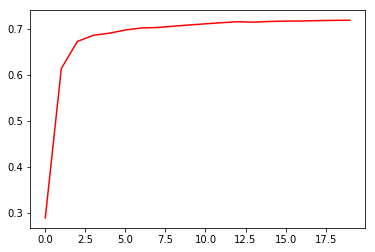

In [46]:
errors = np.array(errors)

final_errors = errors + 0.04
final_errors.max()
plt.plot(final_errors, '-r')

#### RF

In [25]:
np.random.seed(42)

In [28]:
param_grid = {
    'min_samples_leaf': [1,2,4,8,16,32],
    'min_samples_split': [2,4,8,16,32,64],
    'n_estimators': [500],
    'n_jobs': [-1],
    'verbose': [1]
}

In [29]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = ensemble.RandomForestClassifier(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':2*metrics.roc_auc_score(y_train, clf.predict_proba(df_train.fillna(df_train.mean()))[:,1]) - 1,
        'test':2*metrics.roc_auc_score(y_test, clf.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1
    })
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=64,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished


In [30]:
pd.DataFrame(METRIC_LIST).max()

test     0.697974
train    0.999999
dtype: float64

#### DT

In [31]:
param_grid = {
    'min_samples_leaf': [1,2,4,8,16,32],
    'min_samples_split': [2,4,8,16,32,64],
}

In [32]:
np.random.seed(42)

In [33]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = tree.DecisionTreeClassifier(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':2*metrics.roc_auc_score(y_train, clf.predict_proba(df_train.fillna(df_train.mean()))[:,1]) - 1,
        'test':2*metrics.roc_auc_score(y_test, clf.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1
    })
    

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
pd.DataFrame(METRIC_LIST).max()

test     0.578163
train    0.999999
dtype: float64

#### kNN

In [35]:
np.random.seed(42)

In [36]:
param_grid = {
    'leaf_size': [1,2,4,8,16,32,64],
    'n_neighbors': [1,2,4,8,16,32,64],
    'p': [1,2,3],
    'n_jobs': [-1],
}

In [37]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = neighbors.KNeighborsClassifier(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':2*metrics.roc_auc_score(y_train, clf.predict_proba(df_train.fillna(df_train.mean()))[:,1]) - 1,
        'test':2*metrics.roc_auc_score(y_test, clf.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1
    })
    

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=8, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=64, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
           weights='uniform')

In [38]:
pd.DataFrame(METRIC_LIST).max()

test     0.396289
train    0.998840
dtype: float64

#### xgboost

In [39]:
import xgboost as xgb

In [40]:
np.random.seed(42)

In [41]:
dtrain = xgb.DMatrix(df_train.fillna(df_train.mean()), label=y_train)
dtest = xgb.DMatrix(df_test.fillna(df_train.mean()), label=y_test)

In [42]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'nthread': [-1],
        'eval_metric': ['auc'],
        }

In [43]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    evallist = [(dtrain, 'train'), (dtest, 'eval')]
    num_round = 100
    bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10)
    METRIC_LIST.append({'best_score':2*bst.best_score - 1})
    

[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.692296	eval-auc:0.660274
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.791882	eval-auc:0.791432
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.81619	eval-auc:0.820346
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-auc:0.826089	eval-auc:0.827572
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.833059	eval-auc:0.833677
[07:29:36] /workspace/src/tree/updater_p

[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[16]	train-auc:0.868976	eval-auc:0.838313
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[17]	train-auc:0.870746	eval-auc:0.838484
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[18]	train-auc:0.87204	eval-auc:0.84003
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[19]	train-auc:0.873189	eval-auc:0.84133
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	train-auc:0.875725	eval-auc:0.841896
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[21]	train-auc:0.876965	eval-auc:0.842088
[07:29:36] /wo

[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[28]	train-auc:0.890578	eval-auc:0.847401
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[29]	train-auc:0.892977	eval-auc:0.846628
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[30]	train-auc:0.893761	eval-auc:0.847563
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[31]	train-auc:0.895065	eval-auc:0.846581
[07:29:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[32]	train-auc:0.896062	eval-auc:0.84757
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[33]	train-auc:0.896062	eval-auc:0.84757
[07:29:37] /wo

[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-auc:0.840485	eval-auc:0.822827
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-auc:0.846163	eval-auc:0.828032
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-auc:0.847924	eval-auc:0.829325
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-auc:0.850254	eval-auc:0.832824
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10]	train-auc:0.856506	eval-auc:0.835494
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-auc:0.858991	eval-auc:0.835677
[07:29:37] /wo

[9]	train-auc:0.852555	eval-auc:0.834993
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10]	train-auc:0.853637	eval-auc:0.835174
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[11]	train-auc:0.856415	eval-auc:0.836333
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[12]	train-auc:0.860692	eval-auc:0.837039
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-auc:0.862158	eval-auc:0.836329
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[14]	train-auc:0.866719	eval-auc:0.840487
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-

[59]	train-auc:0.90461	eval-auc:0.849878
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[60]	train-auc:0.90461	eval-auc:0.849878
Stopping. Best iteration:
[50]	train-auc:0.903333	eval-auc:0.851148

[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.692296	eval-auc:0.660274
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[1]	train-auc:0.791708	eval-auc:0.791641
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.81557	eval-auc:0.821733
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes,

[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13]	train-auc:0.863931	eval-auc:0.841989
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-auc:0.865066	eval-auc:0.840857
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-auc:0.867061	eval-auc:0.840146
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[16]	train-auc:0.868241	eval-auc:0.840717
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[17]	train-auc:0.869694	eval-auc:0.839674
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[18]	train-auc:0.871857	eval-auc:0.841684
[07:29:37]

[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[19]	train-auc:0.875772	eval-auc:0.846324
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	train-auc:0.87944	eval-auc:0.846098
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[21]	train-auc:0.881407	eval-auc:0.846951
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[22]	train-auc:0.88373	eval-auc:0.84745
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[23]	train-auc:0.88502	eval-auc:0.847427
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[24]	train-auc:0.885545	eval-auc:0.847213
[07:29:37] /wor

[12]	train-auc:0.885287	eval-auc:0.842038
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[13]	train-auc:0.886772	eval-auc:0.841656
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[14]	train-auc:0.890125	eval-auc:0.844053
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[15]	train-auc:0.893462	eval-auc:0.843014
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 16 pruned nodes, max_depth=3
[16]	train-auc:0.893977	eval-auc:0.842862
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[17]	train-auc:0.89561	eval-auc:0.841934
[07:29:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=4
[18]	trai

[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[23]	train-auc:0.916409	eval-auc:0.845608
Stopping. Best iteration:
[13]	train-auc:0.894572	eval-auc:0.847014

[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.718226	eval-auc:0.680302
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[1]	train-auc:0.813821	eval-auc:0.801526
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=4
[2]	train-auc:0.833434	eval-auc:0.820767
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[3]	train

[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[22]	train-auc:0.901053	eval-auc:0.84921
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 12 pruned nodes, max_depth=4
[23]	train-auc:0.901546	eval-auc:0.84871
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[24]	train-auc:0.903374	eval-auc:0.848734
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[25]	train-auc:0.903374	eval-auc:0.848734
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[26]	train-auc:0.904341	eval-auc:0.848956
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[27]	train-auc:0.90577	eval-auc:0.850025
[07:29:38]

[32]	train-auc:0.920887	eval-auc:0.844516
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[33]	train-auc:0.920887	eval-auc:0.844516
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[34]	train-auc:0.920887	eval-auc:0.844516
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[35]	train-auc:0.920887	eval-auc:0.844516
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[36]	train-auc:0.921623	eval-auc:0.844243
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[37]	train-auc:0.921623	eval-auc:0.844243
Stopping. Best iteration:
[27]	train-auc:0.916412	eval-auc:0.846894

[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning 

[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=4
[9]	train-auc:0.869457	eval-auc:0.837902
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[10]	train-auc:0.875815	eval-auc:0.841918
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=4
[11]	train-auc:0.878575	eval-auc:0.843661
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[12]	train-auc:0.881781	eval-auc:0.842429
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[13]	train-auc:0.882327	eval-auc:0.842518
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[14]	train-auc:0.884736	eval-auc:0.842477
[07:29:38]

Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=5
[1]	train-auc:0.837931	eval-auc:0.80612
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=5
[2]	train-auc:0.852139	eval-auc:0.816693
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=5
[3]	train-auc:0.863717	eval-auc:0.817226
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=5
[4]	train-auc:0.873574	eval-auc:0.824986
[07:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=5
[5]	train-auc:0.884239	eval-auc:0.83101
[07:29:38] /workspace/src/tree/updater_

[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 18 pruned nodes, max_depth=5
[14]	train-auc:0.914896	eval-auc:0.827041
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 30 pruned nodes, max_depth=5
[15]	train-auc:0.917549	eval-auc:0.826355
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[16]	train-auc:0.918008	eval-auc:0.826895
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 34 pruned nodes, max_depth=5
[17]	train-auc:0.919626	eval-auc:0.826309
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 28 pruned nodes, max_depth=5
[18]	train-auc:0.920296	eval-auc:0.827485
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 22 pruned nodes, max_depth=5
[19]	train-auc:0.921792	eval-auc:0.827903
[07:2

[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 14 pruned nodes, max_depth=5
[17]	train-auc:0.906461	eval-auc:0.843065
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 26 pruned nodes, max_depth=5
[18]	train-auc:0.907781	eval-auc:0.844368
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 14 pruned nodes, max_depth=5
[19]	train-auc:0.908305	eval-auc:0.845473
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 22 pruned nodes, max_depth=5
[20]	train-auc:0.910733	eval-auc:0.844813
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 14 pruned nodes, max_depth=5
[21]	train-auc:0.912546	eval-auc:0.84453
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=5
[22]	train-auc:0.913054	eval-auc:0.844072
[07:2

[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 8 pruned nodes, max_depth=5
[2]	train-auc:0.841518	eval-auc:0.80734
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=5
[3]	train-auc:0.858279	eval-auc:0.820788
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=5
[4]	train-auc:0.873027	eval-auc:0.830496
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 6 pruned nodes, max_depth=5
[5]	train-auc:0.88146	eval-auc:0.835404
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=5
[6]	train-auc:0.887469	eval-auc:0.838698
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 14 pruned nodes, max_depth=5
[7]	train-auc:0.89359	eval-auc:0.840353
[07:29:39] /wor

[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=5
[5]	train-auc:0.879804	eval-auc:0.826047
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[6]	train-auc:0.885521	eval-auc:0.829407
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 28 pruned nodes, max_depth=5
[7]	train-auc:0.888819	eval-auc:0.833755
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=5
[8]	train-auc:0.892796	eval-auc:0.834551
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 34 pruned nodes, max_depth=4
[9]	train-auc:0.893377	eval-auc:0.836325
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=5
[10]	train-auc:0.897886	eval-auc:0.833718
[07:29:39] 

[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=5
[8]	train-auc:0.895329	eval-auc:0.840438
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=5
[9]	train-auc:0.90304	eval-auc:0.838633
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 10 pruned nodes, max_depth=5
[10]	train-auc:0.905758	eval-auc:0.840045
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 24 pruned nodes, max_depth=5
[11]	train-auc:0.906441	eval-auc:0.841168
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 16 pruned nodes, max_depth=5
[12]	train-auc:0.909341	eval-auc:0.840459
[07:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 18 pruned nodes, max_depth=5
[13]	train-auc:0.911549	eval-auc:0.840044
[07:29:39

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[28]	train-auc:0.86933	eval-auc:0.846789
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[29]	train-auc:0.869734	eval-auc:0.846537
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[30]	train-auc:0.870148	eval-auc:0.846509
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[31]	train-auc:0.870148	eval-auc:0.846509
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[32]	train-auc:0.870148	eval-auc:0.846509
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[33]	train-auc:0.870767	eval-auc:0.847671
[07:29:40] /wo

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[78]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[79]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[80]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[81]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[82]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[83]	train-auc:0.88755	eval-auc:0.857405
[07:29:40] /works

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[39]	train-auc:0.882773	eval-auc:0.852966
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[40]	train-auc:0.882773	eval-auc:0.852966
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[41]	train-auc:0.883441	eval-auc:0.852253
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[42]	train-auc:0.883441	eval-auc:0.852253
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[43]	train-auc:0.883846	eval-auc:0.852226
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[44]	train-auc:0.883846	eval-auc:0.852226
[07:29:40] /w

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.824264	eval-auc:0.825062
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[4]	train-auc:0.831129	eval-auc:0.833251
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.840132	eval-auc:0.835804
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[6]	train-auc:0.842158	eval-auc:0.83539
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-auc:0.844576	eval-auc:0.835502
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[8]	train-auc:0.848885	eval-auc:0.837185
[07:29:40] /worksp

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[53]	train-auc:0.877335	eval-auc:0.849524
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[54]	train-auc:0.877335	eval-auc:0.849524
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[55]	train-auc:0.877335	eval-auc:0.849524
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 8 pruned nodes, max_depth=1
[56]	train-auc:0.877215	eval-auc:0.849115
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[57]	train-auc:0.877608	eval-auc:0.849786
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[58]	train-auc:0.877608	eval-auc:0.849786
[07:29:40] /

[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[14]	train-auc:0.864184	eval-auc:0.845259
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[15]	train-auc:0.864795	eval-auc:0.845108
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[16]	train-auc:0.864298	eval-auc:0.844443
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[17]	train-auc:0.864298	eval-auc:0.844443
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[18]	train-auc:0.866716	eval-auc:0.846636
[07:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[19]	train-auc:0.868534	eval-auc:0.847891
[07:29:40] 

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[25]	train-auc:0.875622	eval-auc:0.847059
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[26]	train-auc:0.876519	eval-auc:0.846438
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[27]	train-auc:0.876519	eval-auc:0.846438
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[28]	train-auc:0.876519	eval-auc:0.846438
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[29]	train-auc:0.878068	eval-auc:0.845994
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[30]	train-auc:0.879959	eval-auc:0.846813
[07:29:41] /

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[31]	train-auc:0.86891	eval-auc:0.845701
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[32]	train-auc:0.869889	eval-auc:0.844155
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[33]	train-auc:0.871537	eval-auc:0.844278
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[34]	train-auc:0.87178	eval-auc:0.845127
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[35]	train-auc:0.87178	eval-auc:0.845127
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[36]	train-auc:0.873	eval-auc:0.844873
[07:29:41] /workspac

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[40]	train-auc:0.88197	eval-auc:0.847013
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[41]	train-auc:0.88197	eval-auc:0.847013
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[42]	train-auc:0.88197	eval-auc:0.847013
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[43]	train-auc:0.883681	eval-auc:0.848867
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[44]	train-auc:0.883681	eval-auc:0.848867
Stopping. Best iteration:
[34]	train-auc:0.878414	eval-auc:0.849599

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes,

[43]	train-auc:0.87866	eval-auc:0.853189
Stopping. Best iteration:
[33]	train-auc:0.877391	eval-auc:0.853587

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[0]	train-auc:0.717708	eval-auc:0.680185
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[1]	train-auc:0.812553	eval-auc:0.803939
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[2]	train-auc:0.833003	eval-auc:0.823143
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[3]	train-auc:0.843811	eval-auc:0.824317
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes

[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[12]	train-auc:0.875001	eval-auc:0.84505
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[13]	train-auc:0.876364	eval-auc:0.845998
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[14]	train-auc:0.879009	eval-auc:0.845378
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[15]	train-auc:0.880538	eval-auc:0.845574
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[16]	train-auc:0.880538	eval-auc:0.845574
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[17]	train-auc:0.880538	eval-auc:0.845574
[07:29:4

[21]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[22]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[23]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[24]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[25]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[26]	train-auc:0.892358	eval-auc:0.847562
[07:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[27]	train

[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[43]	train-auc:0.889827	eval-auc:0.848294
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[44]	train-auc:0.890287	eval-auc:0.848737
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[45]	train-auc:0.891132	eval-auc:0.848978
Stopping. Best iteration:
[35]	train-auc:0.887857	eval-auc:0.848983

[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=4
[0]	train-auc:0.723701	eval-auc:0.706245
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[1]	trai

[0]	train-auc:0.756409	eval-auc:0.750131
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[1]	train-auc:0.804842	eval-auc:0.799006
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[2]	train-auc:0.807282	eval-auc:0.795686
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[3]	train-auc:0.825315	eval-auc:0.811583
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[4]	train-auc:0.846278	eval-auc:0.825792
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[5]	train-auc:0.852671	eval-auc:0.829

[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[7]	train-auc:0.859777	eval-auc:0.8419
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[8]	train-auc:0.86214	eval-auc:0.842533
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=2
[9]	train-auc:0.862852	eval-auc:0.844539
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=3
[10]	train-auc:0.864176	eval-auc:0.844731
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[11]	train-auc:0.866378	eval-auc:0.844263
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[12]	train-auc:0.866842	eval-auc:0.845809
[07:29:42] /wor

[23]	train-auc:0.888663	eval-auc:0.848112
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[24]	train-auc:0.888663	eval-auc:0.848112
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[25]	train-auc:0.889564	eval-auc:0.849917
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[26]	train-auc:0.89077	eval-auc:0.84969
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 16 pruned nodes, max_depth=2
[27]	train-auc:0.891576	eval-auc:0.850326
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[28]	train-auc:0.891576	eval-auc:0.850326
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[29]	train-a

[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[27]	train-auc:0.889112	eval-auc:0.84771
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[28]	train-auc:0.88977	eval-auc:0.847286
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[29]	train-auc:0.890567	eval-auc:0.847027
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[30]	train-auc:0.892179	eval-auc:0.847635
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[31]	train-auc:0.892179	eval-auc:0.847635
[07:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[32]	train-auc:0.893257	eval-auc:0.848447
[07:29:42] /

[27]	train-auc:0.901028	eval-auc:0.846996
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 46 pruned nodes, max_depth=4
[28]	train-auc:0.902372	eval-auc:0.847655
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[29]	train-auc:0.902372	eval-auc:0.847655
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 32 pruned nodes, max_depth=5
[30]	train-auc:0.903306	eval-auc:0.846933
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[31]	train-auc:0.903306	eval-auc:0.846933
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=5
[32]	train-auc:0.904638	eval-auc:0.846077
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 38 pruned nodes, max_depth=3
[33]	tra

[37]	train-auc:0.905067	eval-auc:0.843892
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 40 pruned nodes, max_depth=3
[38]	train-auc:0.905356	eval-auc:0.843495
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 40 pruned nodes, max_depth=5
[39]	train-auc:0.906176	eval-auc:0.843955
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[40]	train-auc:0.906176	eval-auc:0.843955
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[41]	train-auc:0.906176	eval-auc:0.843955
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[42]	train-auc:0.906176	eval-auc:0.843955
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[43]	trai

[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 22 pruned nodes, max_depth=5
[6]	train-auc:0.876365	eval-auc:0.838178
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 38 pruned nodes, max_depth=4
[7]	train-auc:0.877928	eval-auc:0.840667
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 26 pruned nodes, max_depth=5
[8]	train-auc:0.87922	eval-auc:0.840419
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 36 pruned nodes, max_depth=5
[9]	train-auc:0.881817	eval-auc:0.841231
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 26 pruned nodes, max_depth=5
[10]	train-auc:0.88577	eval-auc:0.839765
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 40 pruned nodes, max_depth=5
[11]	train-auc:0.88774	eval-auc:0.841544
[07:29:43] 

[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned nodes, max_depth=5
[5]	train-auc:0.879101	eval-auc:0.832605
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 28 pruned nodes, max_depth=5
[6]	train-auc:0.881351	eval-auc:0.831833
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 48 pruned nodes, max_depth=3
[7]	train-auc:0.881972	eval-auc:0.834761
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 28 pruned nodes, max_depth=5
[8]	train-auc:0.88567	eval-auc:0.836932
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 48 pruned nodes, max_depth=1
[9]	train-auc:0.885407	eval-auc:0.838094
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 36 pruned nodes, max_depth=5
[10]	train-auc:0.887368	eval-auc:0.83749
[07:29:43] /

[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 22 pruned nodes, max_depth=5
[9]	train-auc:0.888781	eval-auc:0.840583
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 36 pruned nodes, max_depth=5
[10]	train-auc:0.890213	eval-auc:0.841972
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 28 pruned nodes, max_depth=5
[11]	train-auc:0.891446	eval-auc:0.842746
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 40 pruned nodes, max_depth=4
[12]	train-auc:0.892938	eval-auc:0.843908
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 30 pruned nodes, max_depth=5
[13]	train-auc:0.894523	eval-auc:0.844316
[07:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 26 pruned nodes, max_depth=5
[14]	train-auc:0.897033	eval-auc:0.845578
[07:29

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[31]	train-auc:0.896039	eval-auc:0.851449
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[32]	train-auc:0.896039	eval-auc:0.851449
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[33]	train-auc:0.896039	eval-auc:0.851449
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[34]	train-auc:0.896039	eval-auc:0.851449
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 30 pruned nodes, max_depth=4
[35]	train-auc:0.897278	eval-auc:0.851617
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[36]	train-auc:0.897278	eval-auc:0.851617
[07:29:44]

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=5
[23]	train-auc:0.895878	eval-auc:0.84321
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 26 pruned nodes, max_depth=5
[24]	train-auc:0.898138	eval-auc:0.843378
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 34 pruned nodes, max_depth=3
[25]	train-auc:0.898853	eval-auc:0.842757
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 28 pruned nodes, max_depth=5
[26]	train-auc:0.90054	eval-auc:0.842888
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[27]	train-auc:0.90054	eval-auc:0.842888
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 26 pruned nodes, max_depth=4
[28]	train-auc:0.9013	eval-auc:0.843095
[07:29:44] /

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[20]	train-auc:0.897669	eval-auc:0.846144
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[21]	train-auc:0.897669	eval-auc:0.846144
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[22]	train-auc:0.897669	eval-auc:0.846144
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[23]	train-auc:0.897669	eval-auc:0.846144
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[24]	train-auc:0.897669	eval-auc:0.846144
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 24 pruned nodes, max_depth=5
[25]	train-auc:0.898942	eval-auc:0.845944
[07:29:44

Stopping. Best iteration:
[21]	train-auc:0.859634	eval-auc:0.845367

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[0]	train-auc:0.703625	eval-auc:0.689883
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.796587	eval-auc:0.79405
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.816904	eval-auc:0.810635
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.820355	eval-auc:0.814292
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[4]	train-au

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[49]	train-auc:0.869926	eval-auc:0.846614
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[50]	train-auc:0.869926	eval-auc:0.846614
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[51]	train-auc:0.869926	eval-auc:0.846614
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[52]	train-auc:0.869926	eval-auc:0.846614
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[53]	train-auc:0.869926	eval-auc:0.846614
Stopping. Best iteration:
[43]	train-auc:0.869926	eval-auc:0.846614

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned no

[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.81557	eval-auc:0.821733
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.824264	eval-auc:0.825062
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[4]	train-auc:0.829917	eval-auc:0.83116
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.839663	eval-auc:0.834981
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[6]	train-auc:0.84214	eval-auc:0.834382
[07:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[7]	train-auc:0.843684	eval-auc:0.834489
[07:29:44] /workspac

[15]	train-auc:0.859601	eval-auc:0.839482
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train-auc:0.859601	eval-auc:0.839482
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.859601	eval-auc:0.839482
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.859601	eval-auc:0.839482
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[19]	train-auc:0.859466	eval-auc:0.838822
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[20]	train-auc:0.861607	eval-auc:0.84166
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[21]	train-a

[10]	train-auc:0.846836	eval-auc:0.833035
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[11]	train-auc:0.849894	eval-auc:0.833684
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[12]	train-auc:0.850725	eval-auc:0.832891
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[13]	train-auc:0.850725	eval-auc:0.832891
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[14]	train-auc:0.855727	eval-auc:0.837763
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[15]	train-auc:0.855727	eval-auc:0.837763
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[16]	train-auc

[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.857277	eval-auc:0.841853
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[20]	train-auc:0.857731	eval-auc:0.843266
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[21]	train-auc:0.857731	eval-auc:0.843266
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[22]	train-auc:0.857731	eval-auc:0.843266
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[23]	train-auc:0.85803	eval-auc:0.842526
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[24]	train-auc:0.858717	eval-auc:0.843522
[07:29:45] /

[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[25]	train-auc:0.864565	eval-auc:0.842458
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[26]	train-auc:0.865696	eval-auc:0.844178
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[27]	train-auc:0.865696	eval-auc:0.844178
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[28]	train-auc:0.865696	eval-auc:0.844178
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[29]	train-auc:0.865696	eval-auc:0.844178
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[30]	train-auc:0.865696	eval-auc:0.844178
[07:29:45]

[28]	train-auc:0.861525	eval-auc:0.843587
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[29]	train-auc:0.861525	eval-auc:0.843587
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[30]	train-auc:0.863926	eval-auc:0.842837
Stopping. Best iteration:
[20]	train-auc:0.861525	eval-auc:0.843587

[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[0]	train-auc:0.71735	eval-auc:0.680714
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[1]	train-auc:0.811691	eval-auc:0.804315
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra node

[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[2]	train-auc:0.82737	eval-auc:0.808161
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[3]	train-auc:0.835403	eval-auc:0.817761
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[4]	train-auc:0.841707	eval-auc:0.823461
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[5]	train-auc:0.843754	eval-auc:0.823672
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[6]	train-auc:0.848439	eval-auc:0.828694
[07:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[7]	train-auc:0.850296	eval-auc:0.82984
[07:29:45] /w

[18]	train-auc:0.87548	eval-auc:0.849514
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[19]	train-auc:0.87548	eval-auc:0.849514
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[20]	train-auc:0.876903	eval-auc:0.849924
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=2
[21]	train-auc:0.878456	eval-auc:0.851283
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[22]	train-auc:0.880063	eval-auc:0.851342
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[23]	train-auc:0.880063	eval-auc:0.851342
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[24]	train-

[34]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[35]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[36]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[37]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[38]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[39]	train-auc:0.872472	eval-auc:0.848983
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[40]	train

[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[7]	train-auc:0.855397	eval-auc:0.838371
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[8]	train-auc:0.856277	eval-auc:0.838661
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[9]	train-auc:0.860841	eval-auc:0.842042
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[10]	train-auc:0.860841	eval-auc:0.842042
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[11]	train-auc:0.864437	eval-auc:0.842731
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=2
[12]	train-auc:0.866623	eval-auc:0.845271
[07:29:46]

[14]	train-auc:0.864706	eval-auc:0.847462
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[15]	train-auc:0.864706	eval-auc:0.847462
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[16]	train-auc:0.864706	eval-auc:0.847462
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[17]	train-auc:0.864706	eval-auc:0.847462
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[18]	train-auc:0.865207	eval-auc:0.848018
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[19]	train-auc:0.865207	eval-auc:0.848018
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[20]	train

[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[25]	train-auc:0.865983	eval-auc:0.844585
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[26]	train-auc:0.865983	eval-auc:0.844585
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[27]	train-auc:0.865983	eval-auc:0.844585
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[28]	train-auc:0.865983	eval-auc:0.844585
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[29]	train-auc:0.865983	eval-auc:0.844585
[07:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[30]	train-auc:0.865983	eval-auc:0.844585
[07:29:46]

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 50 pruned nodes, max_depth=2
[14]	train-auc:0.869879	eval-auc:0.839815
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[15]	train-auc:0.869879	eval-auc:0.839815
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 36 pruned nodes, max_depth=1
[16]	train-auc:0.870454	eval-auc:0.840213
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[17]	train-auc:0.870454	eval-auc:0.840213
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 40 pruned nodes, max_depth=1
[18]	train-auc:0.869821	eval-auc:0.839788
Stopping. Best iteration:
[8]	train-auc:0.864815	eval-auc:0.840603

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 20 pruned no

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[44]	train-auc:0.885767	eval-auc:0.845881
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[45]	train-auc:0.885767	eval-auc:0.845881
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 52 pruned nodes, max_depth=4
[46]	train-auc:0.887268	eval-auc:0.848006
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[47]	train-auc:0.887268	eval-auc:0.848006
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 38 pruned nodes, max_depth=5
[48]	train-auc:0.888752	eval-auc:0.847898
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[49]	train-auc:0.888752	eval-auc:0.847898
[07:29:47

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 26 pruned nodes, max_depth=5
[0]	train-auc:0.731411	eval-auc:0.691036
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 20 pruned nodes, max_depth=5
[1]	train-auc:0.825553	eval-auc:0.806195
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 24 pruned nodes, max_depth=5
[2]	train-auc:0.844061	eval-auc:0.819614
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 32 pruned nodes, max_depth=5
[3]	train-auc:0.852952	eval-auc:0.828659
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 44 pruned nodes, max_depth=5
[4]	train-auc:0.857225	eval-auc:0.836087
[07:29:47] /workspace/src/tree/upd

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[29]	train-auc:0.878412	eval-auc:0.843889
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[30]	train-auc:0.878412	eval-auc:0.843889
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[31]	train-auc:0.878412	eval-auc:0.843889
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 46 pruned nodes, max_depth=4
[32]	train-auc:0.88034	eval-auc:0.845254
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[33]	train-auc:0.88034	eval-auc:0.845254
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[34]	train-auc:0.88034	eval-auc:0.845254
[07:29:47] /w

[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 46 pruned nodes, max_depth=5
[11]	train-auc:0.873145	eval-auc:0.842387
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 42 pruned nodes, max_depth=4
[12]	train-auc:0.875564	eval-auc:0.845886
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[13]	train-auc:0.875564	eval-auc:0.845886
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 38 pruned nodes, max_depth=4
[14]	train-auc:0.877443	eval-auc:0.847986
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 52 pruned nodes, max_depth=2
[15]	train-auc:0.877949	eval-auc:0.84864
[07:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 40 pruned nodes, max_depth=5
[16]	train-auc:0.879591	eval-auc:0.84984
[07:29:47]

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 40 pruned nodes, max_depth=2
[33]	train-auc:0.87516	eval-auc:0.847406
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 22 pruned nodes, max_depth=5
[34]	train-auc:0.876578	eval-auc:0.84819
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[35]	train-auc:0.876578	eval-auc:0.84819
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 22 pruned nodes, max_depth=5
[36]	train-auc:0.878372	eval-auc:0.846629
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 36 pruned nodes, max_depth=3
[37]	train-auc:0.879263	eval-auc:0.846148
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[38]	train-auc:0.879263	eval-auc:0.846148
[07:29:48] 

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 44 pruned nodes, max_depth=4
[4]	train-auc:0.853663	eval-auc:0.828218
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 36 pruned nodes, max_depth=5
[5]	train-auc:0.860735	eval-auc:0.832258
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 42 pruned nodes, max_depth=3
[6]	train-auc:0.863931	eval-auc:0.8359
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 30 pruned nodes, max_depth=5
[7]	train-auc:0.866697	eval-auc:0.837378
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 48 pruned nodes, max_depth=3
[8]	train-auc:0.867749	eval-auc:0.839638
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 34 pruned nodes, max_depth=5
[9]	train-auc:0.871809	eval-auc:0.842457
[07:29:48] /w

Stopping. Best iteration:
[43]	train-auc:0.885994	eval-auc:0.85271

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[0]	train-auc:0.690604	eval-auc:0.665712
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[1]	train-auc:0.790524	eval-auc:0.791801
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.813913	eval-auc:0.820762
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[3]	train-auc:0.822393	eval-auc:0.827185
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[4]	train-auc

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[16]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[20]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[21]	train-auc:0.855286	eval-auc:0.840169
[07:29:48]

[39]	train-auc:0.856444	eval-auc:0.842815
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[40]	train-auc:0.856444	eval-auc:0.842815
Stopping. Best iteration:
[30]	train-auc:0.856444	eval-auc:0.842815

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[0]	train-auc:0.690604	eval-auc:0.665712
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[1]	train-auc:0.790524	eval-auc:0.791801
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.813913	eval-auc:0.820762
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nod

[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[15]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[16]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.855286	eval-auc:0.840169
[07:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[20]	train-auc:0.855286	eval-auc:0.840169
[07:29:48]

[38]	train-auc:0.856444	eval-auc:0.842815
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[39]	train-auc:0.856444	eval-auc:0.842815
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[40]	train-auc:0.856444	eval-auc:0.842815
Stopping. Best iteration:
[30]	train-auc:0.856444	eval-auc:0.842815

[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[0]	train-auc:0.690604	eval-auc:0.665712
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[1]	train-auc:0.790524	eval-auc:0.791801
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra no

[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.855286	eval-auc:0.840169
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.855286	eval-auc:0.840169
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.855286	eval-auc:0.840169
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[20]	train-auc:0.855286	eval-auc:0.840169
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[21]	train-auc:0.855286	eval-auc:0.840169
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[22]	train-auc:0.855286	eval-auc:0.840169
[07:29:49]

[12]	train-auc:0.850144	eval-auc:0.839167
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[13]	train-auc:0.85055	eval-auc:0.839452
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[14]	train-auc:0.854026	eval-auc:0.839197
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[15]	train-auc:0.854026	eval-auc:0.839197
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[16]	train-auc:0.854026	eval-auc:0.839197
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[17]	train-auc:0.854026	eval-auc:0.839197
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[18]	train-

[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[18]	train-auc:0.856976	eval-auc:0.837681
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[19]	train-auc:0.856976	eval-auc:0.837681
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[20]	train-auc:0.856976	eval-auc:0.837681
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[21]	train-auc:0.857569	eval-auc:0.837363
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[22]	train-auc:0.857569	eval-auc:0.837363
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[23]	train-auc:0.857569	eval-auc:0.837363
[07:29:49]

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[1]	train-auc:0.808281	eval-auc:0.803059
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[2]	train-auc:0.823111	eval-auc:0.822041
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[3]	train-auc:0.831624	eval-auc:0.824209
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[4]	train-auc:0.837319	eval-auc:0.834484
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[5]	train-auc:0.841452	eval-auc:0.83615
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3


[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[6]	train-auc:0.841172	eval-auc:0.821515
[07:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[7]	train-auc:0.842131	eval-auc:0.823426
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[8]	train-auc:0.842303	eval-auc:0.824852
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[9]	train-auc:0.841897	eval-auc:0.825555
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[10]	train-auc:0.847042	eval-auc:0.830084
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[11]	train-auc:0.847042	eval-auc:0.830084
[07:29:50] /wo

[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[30]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[31]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[32]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[33]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[34]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[35]	train-auc:0.863837	eval-auc:0.844646
[07:29:50]

[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[9]	train-auc:0.841897	eval-auc:0.825555
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[10]	train-auc:0.847042	eval-auc:0.830084
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[11]	train-auc:0.847042	eval-auc:0.830084
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[12]	train-auc:0.85289	eval-auc:0.832641
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 20 pruned nodes, max_depth=2
[13]	train-auc:0.85399	eval-auc:0.834534
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=2
[14]	train-auc:0.856976	eval-auc:0.837681
[07:29:50] /

[32]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[33]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[34]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[35]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[36]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[37]	train-auc:0.863837	eval-auc:0.844646
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[38]	train

[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 38 pruned nodes, max_depth=5
[1]	train-auc:0.819664	eval-auc:0.795706
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 42 pruned nodes, max_depth=4
[2]	train-auc:0.832313	eval-auc:0.810352
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 44 pruned nodes, max_depth=4
[3]	train-auc:0.839545	eval-auc:0.820583
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 42 pruned nodes, max_depth=5
[4]	train-auc:0.846036	eval-auc:0.826085
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 56 pruned nodes, max_depth=3
[5]	train-auc:0.846622	eval-auc:0.82675
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 54 pruned nodes, max_depth=2
[6]	train-auc:0.847851	eval-auc:0.826854
[07:29:50] /w

Stopping. Best iteration:
[14]	train-auc:0.873613	eval-auc:0.843287

[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 32 pruned nodes, max_depth=5
[0]	train-auc:0.72217	eval-auc:0.692008
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 26 pruned nodes, max_depth=5
[1]	train-auc:0.824799	eval-auc:0.817967
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 38 pruned nodes, max_depth=5
[2]	train-auc:0.831556	eval-auc:0.82399
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 44 pruned nodes, max_depth=4
[3]	train-auc:0.838669	eval-auc:0.828414
[07:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 48 pruned nodes, max_depth=4
[4]	train

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[19]	train-auc:0.856996	eval-auc:0.836293
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[20]	train-auc:0.856996	eval-auc:0.836293
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[21]	train-auc:0.856996	eval-auc:0.836293
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[22]	train-auc:0.856996	eval-auc:0.836293
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[23]	train-auc:0.856996	eval-auc:0.836293
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[24]	train-auc:0.856996	eval-auc:0.836293
Stopping. 

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[17]	train-auc:0.856625	eval-auc:0.835642
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 44 pruned nodes, max_depth=2
[18]	train-auc:0.857677	eval-auc:0.837729
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[19]	train-auc:0.857677	eval-auc:0.837729
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 48 pruned nodes, max_depth=2
[20]	train-auc:0.859114	eval-auc:0.839842
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 42 pruned nodes, max_depth=2
[21]	train-auc:0.86063	eval-auc:0.842018
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[22]	train-auc:0.86063	eval-auc:0.842018
[07:29:51] /

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 46 pruned nodes, max_depth=3
[8]	train-auc:0.865214	eval-auc:0.838337
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[9]	train-auc:0.865214	eval-auc:0.838337
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 40 pruned nodes, max_depth=3
[10]	train-auc:0.866329	eval-auc:0.839302
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[11]	train-auc:0.866329	eval-auc:0.839302
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 44 pruned nodes, max_depth=3
[12]	train-auc:0.866858	eval-auc:0.839318
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[13]	train-auc:0.866858	eval-auc:0.839318
[07:29:51] /

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train-auc:0.823796	eval-auc:0.825193
Stopping. Best iteration:
[6]	train-auc:0.825549	eval-auc:0.826505

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[0]	train-auc:0.697063	eval-auc:0.686527
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[1]	train-auc:0.783539	eval-auc:0.785116
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[2]	train-auc:0.803808	eval-auc:0.801311
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[3]	train-auc:0

[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[8]	train-auc:0.823712	eval-auc:0.826302
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9]	train-auc:0.823712	eval-auc:0.826302
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[10]	train-auc:0.823796	eval-auc:0.825193
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[11]	train-auc:0.823796	eval-auc:0.825193
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:0.823796	eval-auc:0.825193
[07:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[13]	train-auc:0.823796	eval-auc:0.825193
[07:29:51] /

[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[0]	train-auc:0.681414	eval-auc:0.6654
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[1]	train-auc:0.773899	eval-auc:0.773973
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[2]	train-auc:0.804624	eval-auc:0.804185
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[3]	train-auc:0.809437	eval-auc:0.810707
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[4]	train-auc:0.817032	eval-auc:0.8215
[07:29:52] /workspace/src/tree/updater_prune.c

[10]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[11]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[13]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[14]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[15]	train-auc:0.826551	eval-auc:0.823767
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train

[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[4]	train-auc:0.81151	eval-auc:0.814015
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[5]	train-auc:0.814436	eval-auc:0.815723
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[6]	train-auc:0.819029	eval-auc:0.81831
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[7]	train-auc:0.822826	eval-auc:0.820618
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[8]	train-auc:0.822826	eval-auc:0.820618
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[9]	train-auc:0.822826	eval-auc:0.820618
[07:29:52] /worksp

[8]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[9]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[10]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[11]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[12]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[13]	train-auc:0.823262	eval-auc:0.815414
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[14]	train-a

[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[11]	train-auc:0.823004	eval-auc:0.815739
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[12]	train-auc:0.823004	eval-auc:0.815739
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[13]	train-auc:0.823004	eval-auc:0.815739
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[14]	train-auc:0.823004	eval-auc:0.815739
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[15]	train-auc:0.823004	eval-auc:0.815739
Stopping. Best iteration:
[5]	train-auc:0.820146	eval-auc:0.817118

[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned no

[24]	train-auc:0.828178	eval-auc:0.825015
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[25]	train-auc:0.828178	eval-auc:0.825015
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[26]	train-auc:0.828178	eval-auc:0.825015
Stopping. Best iteration:
[16]	train-auc:0.828178	eval-auc:0.825015

[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 44 pruned nodes, max_depth=4
[0]	train-auc:0.698923	eval-auc:0.682547
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 48 pruned nodes, max_depth=2
[1]	train-auc:0.786897	eval-auc:0.791757
[07:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra no

Stopping. Best iteration:
[18]	train-auc:0.826358	eval-auc:0.820434

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 46 pruned nodes, max_depth=5
[0]	train-auc:0.76421	eval-auc:0.759065
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 56 pruned nodes, max_depth=2
[1]	train-auc:0.78201	eval-auc:0.785344
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 54 pruned nodes, max_depth=2
[2]	train-auc:0.783186	eval-auc:0.783746
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 54 pruned nodes, max_depth=2
[3]	train-auc:0.799107	eval-auc:0.800288
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 52 pruned nodes, max_depth=3
[4]	train-au

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[13]	train-auc:0.825275	eval-auc:0.817402
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 48 pruned nodes, max_depth=1
[14]	train-auc:0.823788	eval-auc:0.817543
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[15]	train-auc:0.823788	eval-auc:0.817543
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[16]	train-auc:0.823788	eval-auc:0.817543
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[17]	train-auc:0.823788	eval-auc:0.817543
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 48 pruned nodes, max_depth=2
[18]	train-auc:0.826358	eval-auc:0.820434
[07:29:53]

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[14]	train-auc:0.823004	eval-auc:0.815739
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[15]	train-auc:0.823004	eval-auc:0.815739
Stopping. Best iteration:
[5]	train-auc:0.820146	eval-auc:0.817118

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 30 pruned nodes, max_depth=5
[0]	train-auc:0.713558	eval-auc:0.703329
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 54 pruned nodes, max_depth=3
[1]	train-auc:0.792787	eval-auc:0.795278
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 48 pruned nodes, max_depth=3
[2]	train

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[17]	train-auc:0.826823	eval-auc:0.820953
Stopping. Best iteration:
[7]	train-auc:0.826823	eval-auc:0.820953

[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.720286	eval-auc:0.711048
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.788758	eval-auc:0.782213
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.806045	eval-auc:0.798826
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-a

Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.782451	eval-auc:0.772431
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.810074	eval-auc:0.794623
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-auc:0.817414	eval-auc:0.802493
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.828807	eval-auc:0.812055
[07:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.835531	eval-auc:0.814465
[07:29:53] /workspace/src/tree/updater_

[12]	train-auc:0.865617	eval-auc:0.84176
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13]	train-auc:0.869133	eval-auc:0.843301
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-auc:0.87222	eval-auc:0.843716
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[15]	train-auc:0.874298	eval-auc:0.843826
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.87745	eval-auc:0.846546
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[17]	train-auc:0.879356	eval-auc:0.846332
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[18]	train-au

[31]	train-auc:0.886813	eval-auc:0.842973
Stopping. Best iteration:
[21]	train-auc:0.875916	eval-auc:0.844028

[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.715987	eval-auc:0.712766
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.782451	eval-auc:0.772431
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.810074	eval-auc:0.794623
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-auc:0.817279	eval-auc:0.803473
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra node

[2]	train-auc:0.791895	eval-auc:0.795281
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-auc:0.817961	eval-auc:0.816844
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.83299	eval-auc:0.820906
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.834513	eval-auc:0.823388
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-auc:0.841603	eval-auc:0.827848
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-auc:0.845072	eval-auc:0.829479
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-auc:0.8

[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-auc:0.851046	eval-auc:0.829802
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-auc:0.852821	eval-auc:0.831929
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-auc:0.856717	eval-auc:0.832104
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-auc:0.859761	eval-auc:0.833055
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-auc:0.860498	eval-auc:0.83539
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13]	train-auc:0.861908	eval-auc:0.835373
[07:29:54] /w

[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.834496	eval-auc:0.813162
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-auc:0.841137	eval-auc:0.821289
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[7]	train-auc:0.84615	eval-auc:0.82616
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-auc:0.849851	eval-auc:0.829182
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-auc:0.855876	eval-auc:0.83141
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-auc:0.861476	eval-auc:0.836529
[07:29:54] /worksp

[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-auc:0.863717	eval-auc:0.838743
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[12]	train-auc:0.865068	eval-auc:0.840446
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13]	train-auc:0.868762	eval-auc:0.841953
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-auc:0.872329	eval-auc:0.843305
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[15]	train-auc:0.874544	eval-auc:0.842715
[07:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.876827	eval-auc:0.843404
[07:29:54]

[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=4
[17]	train-auc:0.897011	eval-auc:0.832516
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[18]	train-auc:0.89824	eval-auc:0.833882
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[19]	train-auc:0.901175	eval-auc:0.835433
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[20]	train-auc:0.904861	eval-auc:0.835935
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21]	train-auc:0.905855	eval-auc:0.836732
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[22]	train-auc:0.906801	eval-auc:0.835202
[07:29:55

[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.78322	eval-auc:0.766651
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-auc:0.808064	eval-auc:0.797159
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-auc:0.82206	eval-auc:0.811951
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-auc:0.845046	eval-auc:0.823789
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-auc:0.85355	eval-auc:0.827191
[07:29:55] /workspace/src/tree/updater_pru

[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 4 pruned nodes, max_depth=4
[15]	train-auc:0.886745	eval-auc:0.830733
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[16]	train-auc:0.888403	eval-auc:0.830576
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-auc:0.891429	eval-auc:0.829546
Stopping. Best iteration:
[7]	train-auc:0.870397	eval-auc:0.833504

[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.734035	eval-auc:0.709097
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train

[10]	train-auc:0.883122	eval-auc:0.840242
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-auc:0.887259	eval-auc:0.841868
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[12]	train-auc:0.889678	eval-auc:0.843085
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[13]	train-auc:0.893938	eval-auc:0.84378
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[14]	train-auc:0.897185	eval-auc:0.842923
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[15]	train-auc:0.898587	eval-auc:0.843477
[07:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[16]	train

[17]	train-auc:0.891737	eval-auc:0.833391
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[18]	train-auc:0.893238	eval-auc:0.835128
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[19]	train-auc:0.893257	eval-auc:0.835604
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[20]	train-auc:0.894932	eval-auc:0.83776
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[21]	train-auc:0.895123	eval-auc:0.838686
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=4
[22]	train-auc:0.897232	eval-auc:0.836794
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=3
[23]	train

[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[35]	train-auc:0.916936	eval-auc:0.837262
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[36]	train-auc:0.918796	eval-auc:0.835902
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[37]	train-auc:0.91942	eval-auc:0.836808
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 4 pruned nodes, max_depth=4
[38]	train-auc:0.920057	eval-auc:0.835992
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[39]	train-auc:0.921075	eval-auc:0.835281
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=4
[40]	train-auc:0.923041	eval-auc:0.834603
[07:29:56

[10]	train-auc:0.904362	eval-auc:0.829529
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=5
[11]	train-auc:0.908251	eval-auc:0.830919
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 28 pruned nodes, max_depth=5
[12]	train-auc:0.910891	eval-auc:0.833035
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 16 pruned nodes, max_depth=5
[13]	train-auc:0.913231	eval-auc:0.833689
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 24 pruned nodes, max_depth=5
[14]	train-auc:0.915338	eval-auc:0.834016
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 20 pruned nodes, max_depth=5
[15]	train-auc:0.91827	eval-auc:0.834343
Stopping. Best iteration:
[5]	train-auc:0.881234	eval-auc:0.834357

[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree prun

[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[11]	train-auc:0.91857	eval-auc:0.83677
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 30 pruned nodes, max_depth=5
[12]	train-auc:0.920689	eval-auc:0.836735
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 34 pruned nodes, max_depth=5
[13]	train-auc:0.922128	eval-auc:0.837582
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 30 pruned nodes, max_depth=5
[14]	train-auc:0.925967	eval-auc:0.838447
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 28 pruned nodes, max_depth=5
[15]	train-auc:0.928842	eval-auc:0.838287
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 32 pruned nodes, max_depth=5
[16]	train-auc:0.929694	eval-auc:0.838325
[07:29:

[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 16 pruned nodes, max_depth=5
[8]	train-auc:0.898908	eval-auc:0.843969
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 24 pruned nodes, max_depth=5
[9]	train-auc:0.901514	eval-auc:0.845736
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 12 pruned nodes, max_depth=5
[10]	train-auc:0.904884	eval-auc:0.847016
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=5
[11]	train-auc:0.907597	eval-auc:0.846089
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 18 pruned nodes, max_depth=5
[12]	train-auc:0.91209	eval-auc:0.846108
[07:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 16 pruned nodes, max_depth=5
[13]	train-auc:0.915334	eval-auc:0.846036
[07:29:5

[9]	train-auc:0.894198	eval-auc:0.833954
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=5
[10]	train-auc:0.896011	eval-auc:0.834211
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=5
[11]	train-auc:0.897507	eval-auc:0.835366
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 26 pruned nodes, max_depth=5
[12]	train-auc:0.898567	eval-auc:0.836647
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=5
[13]	train-auc:0.901838	eval-auc:0.837135
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 16 pruned nodes, max_depth=5
[14]	train-auc:0.904703	eval-auc:0.8369
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 22 pruned nodes, max_depth=5
[15]	tra

[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=5
[33]	train-auc:0.935301	eval-auc:0.846963
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 18 pruned nodes, max_depth=5
[34]	train-auc:0.936205	eval-auc:0.847312
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=5
[35]	train-auc:0.937141	eval-auc:0.845893
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 22 pruned nodes, max_depth=5
[36]	train-auc:0.938607	eval-auc:0.844742
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 16 pruned nodes, max_depth=5
[37]	train-auc:0.940408	eval-auc:0.845507
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[38]	train-auc:0.940434	eval-auc:0.845401
Stopp

[12]	train-auc:0.854833	eval-auc:0.829044
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[13]	train-auc:0.855833	eval-auc:0.830779
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[14]	train-auc:0.858281	eval-auc:0.833599
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[15]	train-auc:0.859783	eval-auc:0.834759
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train-auc:0.859783	eval-auc:0.834759
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[17]	train-auc:0.861296	eval-auc:0.835028
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[18]	train-a

[17]	train-auc:0.871544	eval-auc:0.839552
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[18]	train-auc:0.872347	eval-auc:0.839744
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[19]	train-auc:0.872896	eval-auc:0.840355
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[20]	train-auc:0.875147	eval-auc:0.840787
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[21]	train-auc:0.875147	eval-auc:0.840787
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[22]	train-auc:0.876731	eval-auc:0.839902
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[23]	train

[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[15]	train-auc:0.869987	eval-auc:0.841407
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[16]	train-auc:0.872478	eval-auc:0.842135
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.872478	eval-auc:0.842135
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[18]	train-auc:0.873928	eval-auc:0.842754
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[19]	train-auc:0.875355	eval-auc:0.842779
[07:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[20]	train-auc:0.876564	eval-auc:0.843711
[07:29:57] /wo

[26]	train-auc:0.87008	eval-auc:0.840621
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[27]	train-auc:0.871025	eval-auc:0.841692
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 8 pruned nodes, max_depth=1
[28]	train-auc:0.871205	eval-auc:0.841735
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[29]	train-auc:0.871205	eval-auc:0.841735
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[30]	train-auc:0.871205	eval-auc:0.841735
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[31]	train-auc:0.87185	eval-auc:0.841384
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[32]	train-auc:

[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[22]	train-auc:0.87598	eval-auc:0.840437
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[23]	train-auc:0.87598	eval-auc:0.840437
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[24]	train-auc:0.87598	eval-auc:0.840437
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[25]	train-auc:0.876664	eval-auc:0.840626
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[26]	train-auc:0.87808	eval-auc:0.842229
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[27]	train-auc:0.878251	eval-auc:0.841639
[07:29:58] /works

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.781348	eval-auc:0.777382
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.791895	eval-auc:0.795281
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.817566	eval-auc:0.816918
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.832433	eval-auc:0.821496
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[5]	train-auc:0.833177	eval-auc:0.823318
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[

[50]	train-auc:0.882378	eval-auc:0.849545
Stopping. Best iteration:
[40]	train-auc:0.882378	eval-auc:0.849545

[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.720061	eval-auc:0.711048
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[1]	train-auc:0.788468	eval-auc:0.781823
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-auc:0.805564	eval-auc:0.798792
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.819604	eval-auc:0.811793
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra node

[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[49]	train-auc:0.88501	eval-auc:0.848589
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[50]	train-auc:0.88501	eval-auc:0.848589
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[51]	train-auc:0.88501	eval-auc:0.848589
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[52]	train-auc:0.88501	eval-auc:0.848589
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[53]	train-auc:0.885051	eval-auc:0.848472
[07:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[54]	train-auc:0.885556	eval-auc:0.848799
Stopping. Best 

[42]	train-auc:0.882775	eval-auc:0.846347
Stopping. Best iteration:
[32]	train-auc:0.878764	eval-auc:0.847748

[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.747946	eval-auc:0.742914
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.781348	eval-auc:0.777382
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.791895	eval-auc:0.795281
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.817566	eval-auc:0.816918
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra node

[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[17]	train-auc:0.880947	eval-auc:0.834801
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[18]	train-auc:0.881352	eval-auc:0.836214
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[19]	train-auc:0.881852	eval-auc:0.83534
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[20]	train-auc:0.882749	eval-auc:0.836985
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[21]	train-auc:0.883889	eval-auc:0.837956
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[22]	train-auc:0.884455	eval-auc:0.837783
[07:29:59]

[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[67]	train-auc:0.906143	eval-auc:0.841735
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[68]	train-auc:0.906143	eval-auc:0.841735
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[69]	train-auc:0.906711	eval-auc:0.841744
Stopping. Best iteration:
[59]	train-auc:0.902393	eval-auc:0.843724

[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[0]	train-auc:0.734035	eval-auc:0.709097
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[1]	trai

[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[15]	train-auc:0.886283	eval-auc:0.844931
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[16]	train-auc:0.889776	eval-auc:0.845244
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[17]	train-auc:0.890991	eval-auc:0.845696
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[18]	train-auc:0.892203	eval-auc:0.845511
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[19]	train-auc:0.892853	eval-auc:0.844799
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[20]	train-auc:0.892853	eval-auc:0.844799
[07:29:59

[35]	train-auc:0.892041	eval-auc:0.843781
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=4
[36]	train-auc:0.894151	eval-auc:0.845692
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[37]	train-auc:0.896289	eval-auc:0.845023
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[38]	train-auc:0.89849	eval-auc:0.844199
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[39]	train-auc:0.89849	eval-auc:0.844199
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[40]	train-auc:0.899772	eval-auc:0.843138
[07:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[41]	tra

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[38]	train-auc:0.900148	eval-auc:0.849621
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[39]	train-auc:0.900148	eval-auc:0.849621
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[40]	train-auc:0.900148	eval-auc:0.849621
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[41]	train-auc:0.900608	eval-auc:0.849575
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[42]	train-auc:0.900608	eval-auc:0.849575
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 20 pruned nodes, max_depth=2
[43]	train-auc:0.90096	eval-auc:0.849872
[07:30:00] 

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[32]	train-auc:0.89269	eval-auc:0.845851
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[33]	train-auc:0.893648	eval-auc:0.846586
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[34]	train-auc:0.89448	eval-auc:0.846148
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[35]	train-auc:0.89448	eval-auc:0.846148
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[36]	train-auc:0.895479	eval-auc:0.845108
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[37]	train-auc:0.895479	eval-auc:0.845108
[07:30:00] /w

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[37]	train-auc:0.892949	eval-auc:0.834294
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 16 pruned nodes, max_depth=3
[38]	train-auc:0.893528	eval-auc:0.836974
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[39]	train-auc:0.893528	eval-auc:0.836974
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[40]	train-auc:0.894235	eval-auc:0.836352
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[41]	train-auc:0.894189	eval-auc:0.835904
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[42]	train-auc:0.894546	eval-auc:0.835466
[07:30:00

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[31]	train-auc:0.896072	eval-auc:0.849097
Stopping. Best iteration:
[21]	train-auc:0.890881	eval-auc:0.849244

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[0]	train-auc:0.782895	eval-auc:0.766861
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[1]	train-auc:0.806878	eval-auc:0.7986
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[2]	train-auc:0.820865	eval-auc:0.814436
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[3]	train-au

[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 28 pruned nodes, max_depth=5
[13]	train-auc:0.897945	eval-auc:0.833314
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 34 pruned nodes, max_depth=5
[14]	train-auc:0.901824	eval-auc:0.835906
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 42 pruned nodes, max_depth=4
[15]	train-auc:0.90329	eval-auc:0.836828
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[16]	train-auc:0.90329	eval-auc:0.836828
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 32 pruned nodes, max_depth=5
[17]	train-auc:0.904341	eval-auc:0.837347
[07:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 30 pruned nodes, max_depth=5
[18]	train-auc:0.905621	eval-auc:0.837558
[07:30:

[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 44 pruned nodes, max_depth=3
[30]	train-auc:0.905371	eval-auc:0.84679
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[31]	train-auc:0.905371	eval-auc:0.84679
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 50 pruned nodes, max_depth=5
[32]	train-auc:0.906208	eval-auc:0.84596
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 36 pruned nodes, max_depth=4
[33]	train-auc:0.90717	eval-auc:0.845254
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[34]	train-auc:0.90717	eval-auc:0.845254
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 46 pruned nodes, max_depth=5
[35]	train-auc:0.908784	eval-auc:0.845643
Stopping. Be

[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[17]	train-auc:0.894072	eval-auc:0.834167
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 14 pruned nodes, max_depth=5
[18]	train-auc:0.896116	eval-auc:0.832727
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 48 pruned nodes, max_depth=3
[19]	train-auc:0.896858	eval-auc:0.833105
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 44 pruned nodes, max_depth=5
[20]	train-auc:0.898161	eval-auc:0.833673
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 24 pruned nodes, max_depth=5
[21]	train-auc:0.900175	eval-auc:0.836258
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 22 pruned nodes, max_depth=5
[22]	train-auc:0.901046	eval-auc:0.834904
[07:30

[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=5
[7]	train-auc:0.884548	eval-auc:0.837459
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 32 pruned nodes, max_depth=5
[8]	train-auc:0.887674	eval-auc:0.842668
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 32 pruned nodes, max_depth=5
[9]	train-auc:0.889772	eval-auc:0.842419
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 46 pruned nodes, max_depth=3
[10]	train-auc:0.890858	eval-auc:0.841538
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 22 pruned nodes, max_depth=5
[11]	train-auc:0.893898	eval-auc:0.845058
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 40 pruned nodes, max_depth=5
[12]	train-auc:0.895278	eval-auc:0.844544
[07:30:

[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[24]	train-auc:0.908815	eval-auc:0.846025
Stopping. Best iteration:
[14]	train-auc:0.905082	eval-auc:0.84621

[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 12 pruned nodes, max_depth=5
[0]	train-auc:0.753941	eval-auc:0.725588
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 16 pruned nodes, max_depth=5
[1]	train-auc:0.815872	eval-auc:0.806048
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 12 pruned nodes, max_depth=5
[2]	train-auc:0.834517	eval-auc:0.814827
[07:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 18 pruned nodes, max_depth=5
[3]	tra

[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 26 pruned nodes, max_depth=5
[5]	train-auc:0.867459	eval-auc:0.83455
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 32 pruned nodes, max_depth=5
[6]	train-auc:0.869978	eval-auc:0.833747
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 34 pruned nodes, max_depth=5
[7]	train-auc:0.871997	eval-auc:0.834513
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 28 pruned nodes, max_depth=5
[8]	train-auc:0.87437	eval-auc:0.838566
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 28 pruned nodes, max_depth=5
[9]	train-auc:0.877543	eval-auc:0.84173
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 20 pruned nodes, max_depth=5
[10]	train-auc:0.879587	eval-auc:0.840049
[07:30:02] /

[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 26 pruned nodes, max_depth=3
[22]	train-auc:0.907255	eval-auc:0.850657
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[23]	train-auc:0.907768	eval-auc:0.850409
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 32 pruned nodes, max_depth=4
[24]	train-auc:0.908362	eval-auc:0.850754
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=5
[25]	train-auc:0.909565	eval-auc:0.851681
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 30 pruned nodes, max_depth=5
[26]	train-auc:0.910741	eval-auc:0.85216
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 46 pruned nodes, max_depth=3
[27]	train-auc:0.911787	eval-auc:0.850825
[07:30:02

[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[34]	train-auc:0.866442	eval-auc:0.845273
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[35]	train-auc:0.866442	eval-auc:0.845273
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[36]	train-auc:0.866442	eval-auc:0.845273
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[37]	train-auc:0.866442	eval-auc:0.845273
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[38]	train-auc:0.867489	eval-auc:0.847182
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[39]	train-auc:0.868714	eval-auc:0.846831
[07:30:02] /w

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.781008	eval-auc:0.777225
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[2]	train-auc:0.790723	eval-auc:0.795509
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[3]	train-auc:0.81695	eval-auc:0.816901
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.831809	eval-auc:0.821684
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[5]	train-auc:0.832471	eval-auc:0.823354
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[6

[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[23]	train-auc:0.861499	eval-auc:0.838028
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[24]	train-auc:0.861543	eval-auc:0.83818
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[25]	train-auc:0.862166	eval-auc:0.838283
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[26]	train-auc:0.862166	eval-auc:0.838283
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[27]	train-auc:0.862166	eval-auc:0.838283
[07:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[28]	train-auc:0.862166	eval-auc:0.838283
[07:30:02] /w

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[10]	train-auc:0.851461	eval-auc:0.837271
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[11]	train-auc:0.853093	eval-auc:0.83695
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[12]	train-auc:0.856497	eval-auc:0.841338
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[13]	train-auc:0.859704	eval-auc:0.843331
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[14]	train-auc:0.86074	eval-auc:0.844188
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[15]	train-auc:0.862419	eval-auc:0.845217
[07:30:03] /works

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[32]	train-auc:0.860808	eval-auc:0.841798
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[33]	train-auc:0.863137	eval-auc:0.84303
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[34]	train-auc:0.863137	eval-auc:0.84303
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[35]	train-auc:0.863975	eval-auc:0.843773
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[36]	train-auc:0.865058	eval-auc:0.844897
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[37]	train-auc:0.865058	eval-auc:0.844897
[07:30:03] /work

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[34]	train-auc:0.868964	eval-auc:0.846055
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[35]	train-auc:0.868964	eval-auc:0.846055
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[36]	train-auc:0.870386	eval-auc:0.846224
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[37]	train-auc:0.871244	eval-auc:0.846278
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[38]	train-auc:0.871244	eval-auc:0.846278
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[39]	train-auc:0.871244	eval-auc:0.846278
[07:30:03] /

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[3]	train-auc:0.840517	eval-auc:0.824543
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[4]	train-auc:0.84489	eval-auc:0.823192
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=4
[5]	train-auc:0.848129	eval-auc:0.825227
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[6]	train-auc:0.852122	eval-auc:0.82877
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[7]	train-auc:0.853039	eval-auc:0.830945
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[8]	train-auc:0.856597	eval-auc:0.833966
[07:30:03] /w

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[18]	train-auc:0.875839	eval-auc:0.844273
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[19]	train-auc:0.876056	eval-auc:0.844917
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[20]	train-auc:0.876056	eval-auc:0.844917
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[21]	train-auc:0.876056	eval-auc:0.844917
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[22]	train-auc:0.876056	eval-auc:0.844917
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[23]	train-auc:0.876056	eval-auc:0.844917
[07:30:03]

[30]	train-auc:0.878817	eval-auc:0.840341
Stopping. Best iteration:
[20]	train-auc:0.878791	eval-auc:0.840852

[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[0]	train-auc:0.735117	eval-auc:0.711317
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[1]	train-auc:0.805413	eval-auc:0.791858
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[2]	train-auc:0.821029	eval-auc:0.807501
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[3]	train-auc:0.838551	eval-auc:0.823084
[07:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra no

[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 12 pruned nodes, max_depth=4
[9]	train-auc:0.86135	eval-auc:0.839646
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[10]	train-auc:0.865041	eval-auc:0.843346
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[11]	train-auc:0.864712	eval-auc:0.84293
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[12]	train-auc:0.867601	eval-auc:0.842641
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[13]	train-auc:0.870112	eval-auc:0.843069
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[14]	train-auc:0.870112	eval-auc:0.843069
[07:30:04]

[5]	train-auc:0.852739	eval-auc:0.82732
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[6]	train-auc:0.85588	eval-auc:0.830908
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[7]	train-auc:0.859367	eval-auc:0.833405
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[8]	train-auc:0.862821	eval-auc:0.835846
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[9]	train-auc:0.865898	eval-auc:0.837421
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[10]	train-auc:0.865898	eval-auc:0.837421
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[11]	train-a

[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[14]	train-auc:0.864682	eval-auc:0.834489
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[15]	train-auc:0.866434	eval-auc:0.83584
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[16]	train-auc:0.866434	eval-auc:0.83584
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[17]	train-auc:0.866434	eval-auc:0.83584
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[18]	train-auc:0.866496	eval-auc:0.835946
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[19]	train-auc:0.866496	eval-auc:0.835946
[07:30:04] /w

[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[19]	train-auc:0.870016	eval-auc:0.841035
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[20]	train-auc:0.872276	eval-auc:0.841714
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[21]	train-auc:0.872276	eval-auc:0.841714
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[22]	train-auc:0.87338	eval-auc:0.841488
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[23]	train-auc:0.875309	eval-auc:0.842345
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[24]	train-auc:0.875309	eval-auc:0.842345
[07:30:04]

[25]	train-auc:0.876074	eval-auc:0.844123
Stopping. Best iteration:
[15]	train-auc:0.873174	eval-auc:0.844431

[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 22 pruned nodes, max_depth=5
[0]	train-auc:0.743815	eval-auc:0.727112
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 28 pruned nodes, max_depth=5
[1]	train-auc:0.810309	eval-auc:0.804892
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 22 pruned nodes, max_depth=5
[2]	train-auc:0.829546	eval-auc:0.814212
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 28 pruned nodes, max_depth=5
[3]	train-auc:0.851985	eval-auc:0.828861
[07:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra 

[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 38 pruned nodes, max_depth=5
[9]	train-auc:0.87565	eval-auc:0.837682
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 44 pruned nodes, max_depth=4
[10]	train-auc:0.87849	eval-auc:0.839538
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 40 pruned nodes, max_depth=4
[11]	train-auc:0.880042	eval-auc:0.841481
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[12]	train-auc:0.880042	eval-auc:0.841481
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 36 pruned nodes, max_depth=5
[13]	train-auc:0.882175	eval-auc:0.842284
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 50 pruned nodes, max_depth=2
[14]	train-auc:0.882671	eval-auc:0.844344
[07:30:05] 

[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[22]	train-auc:0.888643	eval-auc:0.848032
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[23]	train-auc:0.888643	eval-auc:0.848032
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[24]	train-auc:0.888643	eval-auc:0.848032
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[25]	train-auc:0.888643	eval-auc:0.848032
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[26]	train-auc:0.888643	eval-auc:0.848032
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[27]	train-auc:0.888643	eval-auc:0.848032
[07:30:05]

[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[18]	train-auc:0.884144	eval-auc:0.847908
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 44 pruned nodes, max_depth=5
[19]	train-auc:0.884028	eval-auc:0.848575
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 34 pruned nodes, max_depth=4
[20]	train-auc:0.885956	eval-auc:0.848058
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[21]	train-auc:0.885956	eval-auc:0.848058
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[22]	train-auc:0.885956	eval-auc:0.848058
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[23]	train-auc:0.885956	eval-auc:0.848058
[07:30:0

[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 40 pruned nodes, max_depth=3
[7]	train-auc:0.863568	eval-auc:0.831096
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 28 pruned nodes, max_depth=4
[8]	train-auc:0.866202	eval-auc:0.833695
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 32 pruned nodes, max_depth=5
[9]	train-auc:0.870669	eval-auc:0.830942
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 40 pruned nodes, max_depth=1
[10]	train-auc:0.871243	eval-auc:0.831614
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 42 pruned nodes, max_depth=1
[11]	train-auc:0.870846	eval-auc:0.8314
[07:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 48 pruned nodes, max_depth=1
[12]	train-auc:0.870844	eval-auc:0.832843
[07:30:05] /w

[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 48 pruned nodes, max_depth=3
[25]	train-auc:0.886534	eval-auc:0.846855
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[26]	train-auc:0.886534	eval-auc:0.846855
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[27]	train-auc:0.886534	eval-auc:0.846855
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[28]	train-auc:0.88717	eval-auc:0.846537
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[29]	train-auc:0.88717	eval-auc:0.846537
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[30]	train-auc:0.88717	eval-auc:0.846537
[07:30:06] /w

[7]	train-auc:0.836068	eval-auc:0.825746
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[8]	train-auc:0.837665	eval-auc:0.825262
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[9]	train-auc:0.838616	eval-auc:0.827363
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10]	train-auc:0.841945	eval-auc:0.828797
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[11]	train-auc:0.845002	eval-auc:0.827564
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[12]	train-auc:0.844691	eval-auc:0.82804
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[13]	train-auc:0.

[6]	train-auc:0.835827	eval-auc:0.820983
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[7]	train-auc:0.839263	eval-auc:0.824628
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[8]	train-auc:0.84334	eval-auc:0.829692
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[9]	train-auc:0.846983	eval-auc:0.833499
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[10]	train-auc:0.85164	eval-auc:0.838303
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[11]	train-auc:0.853231	eval-auc:0.840205
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:0.853

[24]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[25]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[26]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[27]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[28]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[29]	train-auc:0.85564	eval-auc:0.842572
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[30]	train-auc:0

[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[33]	train-auc:0.853386	eval-auc:0.836375
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[34]	train-auc:0.853386	eval-auc:0.836375
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[35]	train-auc:0.853386	eval-auc:0.836375
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[36]	train-auc:0.853386	eval-auc:0.836375
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[37]	train-auc:0.853386	eval-auc:0.836375
[07:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[38]	train-auc:0.853386	eval-auc:0.836375
[07:30:06]

Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.781008	eval-auc:0.777225
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[2]	train-auc:0.790723	eval-auc:0.795509
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[3]	train-auc:0.8165	eval-auc:0.817106
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-auc:0.831619	eval-auc:0.821851
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[5]	train-auc:0.832227	eval-auc:0.823465
[07:30:07] /workspace/src/tree/updater_pr

[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[8]	train-auc:0.836211	eval-auc:0.825609
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[9]	train-auc:0.837271	eval-auc:0.827764
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10]	train-auc:0.840634	eval-auc:0.829018
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[11]	train-auc:0.843894	eval-auc:0.82778
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[12]	train-auc:0.843656	eval-auc:0.828307
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[13]	train-auc:0.843656	eval-auc:0.828307
[07:30:07] /work

[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[6]	train-auc:0.835827	eval-auc:0.820983
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[7]	train-auc:0.839263	eval-auc:0.824628
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[8]	train-auc:0.84334	eval-auc:0.829692
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[9]	train-auc:0.846983	eval-auc:0.833499
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[10]	train-auc:0.85164	eval-auc:0.838303
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[11]	train-auc:0.853231	eval-auc:0.840205
[07:30:07] /workspace

[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[24]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[25]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[26]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[27]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[28]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[29]	train-auc:0.85564	eval-auc:0.842572
[07:30:07] /work

[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[32]	train-auc:0.865812	eval-auc:0.836879
Stopping. Best iteration:
[22]	train-auc:0.865812	eval-auc:0.836879

[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[0]	train-auc:0.732241	eval-auc:0.709117
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[1]	train-auc:0.79968	eval-auc:0.780642
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[2]	train-auc:0.824474	eval-auc:0.8033
[07:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=4
[3]	train-

[10]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[11]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[12]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[13]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[14]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[15]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[16]	train-auc:0

[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[5]	train-auc:0.840825	eval-auc:0.822349
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[6]	train-auc:0.84394	eval-auc:0.82373
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[7]	train-auc:0.845277	eval-auc:0.826635
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[8]	train-auc:0.848397	eval-auc:0.829199
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 16 pruned nodes, max_depth=3
[9]	train-auc:0.848991	eval-auc:0.830864
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=4
[10]	train-auc:0.853195	eval-auc:0.831495
[07:30:08] /wo

[17]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[18]	train-auc:0.86369	eval-auc:0.835993
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[19]	train-auc:0.86369	eval-auc:0.835993
Stopping. Best iteration:
[9]	train-auc:0.86369	eval-auc:0.835993

[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[0]	train-auc:0.728475	eval-auc:0.712402
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[1]	train-auc:0.797318	eval-auc:0.785348
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes

[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[10]	train-auc:0.858213	eval-auc:0.837683
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[11]	train-auc:0.860633	eval-auc:0.840268
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[12]	train-auc:0.860633	eval-auc:0.840268
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[13]	train-auc:0.860633	eval-auc:0.840268
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[14]	train-auc:0.861946	eval-auc:0.841206
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[15]	train-auc:0.861946	eval-auc:0.841206
[07:30:08]

[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[27]	train-auc:0.868226	eval-auc:0.843895
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[28]	train-auc:0.868226	eval-auc:0.843895
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[29]	train-auc:0.868226	eval-auc:0.843895
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[30]	train-auc:0.868226	eval-auc:0.843895
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[31]	train-auc:0.868226	eval-auc:0.843895
[07:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[32]	train-auc:0.868226	eval-auc:0.843895
Stopping. 

[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 62 pruned nodes, max_depth=0
[18]	train-auc:0.862634	eval-auc:0.835008
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[19]	train-auc:0.862634	eval-auc:0.835008
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 56 pruned nodes, max_depth=3
[20]	train-auc:0.86475	eval-auc:0.835584
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[21]	train-auc:0.86475	eval-auc:0.835584
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[22]	train-auc:0.86475	eval-auc:0.835584
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[23]	train-auc:0.86475	eval-auc:0.835584
[07:30:09] /wo

[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 44 pruned nodes, max_depth=5
[9]	train-auc:0.858873	eval-auc:0.834503
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 34 pruned nodes, max_depth=4
[10]	train-auc:0.8616	eval-auc:0.836602
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[11]	train-auc:0.8616	eval-auc:0.836602
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 58 pruned nodes, max_depth=1
[12]	train-auc:0.86105	eval-auc:0.837018
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 42 pruned nodes, max_depth=4
[13]	train-auc:0.862576	eval-auc:0.837063
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[14]	train-auc:0.862576	eval-auc:0.837063
[07:30:09] /wo

[1]	train-auc:0.814247	eval-auc:0.804605
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 42 pruned nodes, max_depth=5
[2]	train-auc:0.818808	eval-auc:0.813219
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 36 pruned nodes, max_depth=5
[3]	train-auc:0.841887	eval-auc:0.829428
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 46 pruned nodes, max_depth=5
[4]	train-auc:0.847641	eval-auc:0.827879
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 42 pruned nodes, max_depth=5
[5]	train-auc:0.851001	eval-auc:0.82993
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 30 pruned nodes, max_depth=4
[6]	train-auc:0.857155	eval-auc:0.835411
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 30 pruned nodes, max_depth=5
[7]	train-a

[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[33]	train-auc:0.862885	eval-auc:0.836348
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[34]	train-auc:0.862885	eval-auc:0.836348
Stopping. Best iteration:
[24]	train-auc:0.862885	eval-auc:0.836348

[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 18 pruned nodes, max_depth=5
[0]	train-auc:0.744895	eval-auc:0.711132
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 38 pruned nodes, max_depth=5
[1]	train-auc:0.807034	eval-auc:0.78112
[07:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 32 pruned nodes, max_depth=5
[2]	tra

[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[10]	train-auc:0.861683	eval-auc:0.836009
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[11]	train-auc:0.861683	eval-auc:0.836009
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12]	train-auc:0.861683	eval-auc:0.836009
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[13]	train-auc:0.861683	eval-auc:0.836009
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[14]	train-auc:0.861683	eval-auc:0.836009
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[15]	train-auc:0.861683	eval-auc:0.836009
[07:30:10]

[8]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[10]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[11]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[13]	train-auc:0.818849	eval-auc:0.811519
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[14]	train-a

[13]	train-auc:0.823505	eval-auc:0.81555
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[14]	train-auc:0.823505	eval-auc:0.81555
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[15]	train-auc:0.823505	eval-auc:0.81555
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train-auc:0.823505	eval-auc:0.81555
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.823505	eval-auc:0.81555
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[18]	train-auc:0.823386	eval-auc:0.814663
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:

[6]	train-auc:0.82015	eval-auc:0.815356
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[7]	train-auc:0.820646	eval-auc:0.816331
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[8]	train-auc:0.825684	eval-auc:0.818961
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9]	train-auc:0.825684	eval-auc:0.818961
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[10]	train-auc:0.825684	eval-auc:0.818961
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[11]	train-auc:0.825684	eval-auc:0.818961
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:

[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[5]	train-auc:0.808974	eval-auc:0.80298
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[6]	train-auc:0.813699	eval-auc:0.805939
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[7]	train-auc:0.813277	eval-auc:0.807247
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[8]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[10]	train-auc:0.818252	eval-auc:0.810494
[07:30:10] /work

[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[10]	train-auc:0.821933	eval-auc:0.817401
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[11]	train-auc:0.824444	eval-auc:0.819459
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[12]	train-auc:0.824444	eval-auc:0.819459
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[13]	train-auc:0.824444	eval-auc:0.819459
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[14]	train-auc:0.824444	eval-auc:0.819459
[07:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[15]	train-auc:0.824444	eval-auc:0.819459
[07:30:10]

[16]	train-auc:0.829772	eval-auc:0.825886
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[17]	train-auc:0.829772	eval-auc:0.825886
Stopping. Best iteration:
[7]	train-auc:0.829772	eval-auc:0.825886

[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[0]	train-auc:0.66622	eval-auc:0.658054
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=4
[1]	train-auc:0.768659	eval-auc:0.77589
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[2]	train-auc:0.787522	eval-auc:0.792577
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes,

[3]	train-auc:0.816922	eval-auc:0.817567
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=2
[4]	train-auc:0.826241	eval-auc:0.821854
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[5]	train-auc:0.824661	eval-auc:0.821354
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[6]	train-auc:0.825002	eval-auc:0.821288
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[7]	train-auc:0.829772	eval-auc:0.825886
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[8]	train-auc:0.829772	eval-auc:0.825886
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[9]	train-auc:0.

[11]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[12]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[13]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[14]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[15]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[16]	train-auc:0.829144	eval-auc:0.819602
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[17]	train

Stopping. Best iteration:
[11]	train-auc:0.824444	eval-auc:0.819459

[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 48 pruned nodes, max_depth=4
[0]	train-auc:0.699644	eval-auc:0.710774
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 52 pruned nodes, max_depth=4
[1]	train-auc:0.775899	eval-auc:0.782259
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 48 pruned nodes, max_depth=3
[2]	train-auc:0.80156	eval-auc:0.801038
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 52 pruned nodes, max_depth=2
[3]	train-auc:0.802642	eval-auc:0.803265
[07:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 56 pruned nodes, max_depth=3
[4]	train-

[9]	train-auc:0.821127	eval-auc:0.818218
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 42 pruned nodes, max_depth=1
[10]	train-auc:0.821933	eval-auc:0.817401
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 56 pruned nodes, max_depth=1
[11]	train-auc:0.824444	eval-auc:0.819459
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[12]	train-auc:0.824444	eval-auc:0.819459
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[13]	train-auc:0.824444	eval-auc:0.819459
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[14]	train-auc:0.824444	eval-auc:0.819459
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[15]	train-

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 60 pruned nodes, max_depth=0
[16]	train-auc:0.829772	eval-auc:0.825886
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 60 pruned nodes, max_depth=0
[17]	train-auc:0.829772	eval-auc:0.825886
Stopping. Best iteration:
[7]	train-auc:0.829772	eval-auc:0.825886

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 46 pruned nodes, max_depth=2
[0]	train-auc:0.66622	eval-auc:0.658054
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 42 pruned nodes, max_depth=4
[1]	train-auc:0.768659	eval-auc:0.77589
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 48 pruned nodes, max_depth=3
[2]	train-a

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 48 pruned nodes, max_depth=4
[3]	train-auc:0.816922	eval-auc:0.817567
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 56 pruned nodes, max_depth=2
[4]	train-auc:0.826241	eval-auc:0.821854
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 42 pruned nodes, max_depth=2
[5]	train-auc:0.824661	eval-auc:0.821354
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 42 pruned nodes, max_depth=2
[6]	train-auc:0.825002	eval-auc:0.821288
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 46 pruned nodes, max_depth=3
[7]	train-auc:0.829772	eval-auc:0.825886
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 60 pruned nodes, max_depth=0
[8]	train-auc:0.829772	eval-auc:0.825886
[07:30:12] /work

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[34]	train-auc:0.893038	eval-auc:0.85095
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[35]	train-auc:0.893133	eval-auc:0.850567
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[36]	train-auc:0.89539	eval-auc:0.851077
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[37]	train-auc:0.89625	eval-auc:0.850738
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[38]	train-auc:0.897001	eval-auc:0.850306
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[39]	train-auc:0.898259	eval-auc:0.851026
[07:30:12] /w

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[32]	train-auc:0.892775	eval-auc:0.851753
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 6 pruned nodes, max_depth=1
[33]	train-auc:0.892685	eval-auc:0.85185
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[34]	train-auc:0.892915	eval-auc:0.851602
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[35]	train-auc:0.894456	eval-auc:0.851504
[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[36]	train-auc:0.895986	eval-auc:0.850245
Stopping. Best iteration:
[26]	train-auc:0.888565	eval-auc:0.853227

[07:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes

[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.873065	eval-auc:0.84397
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-auc:0.875417	eval-auc:0.845555
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[18]	train-auc:0.876719	eval-auc:0.847196
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[19]	train-auc:0.877685	eval-auc:0.845985
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[20]	train-auc:0.878496	eval-auc:0.845838
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[21]	train-auc:0.879004	eval-auc:0.847095
[07:30:13] /w

[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[21]	train-auc:0.88088	eval-auc:0.849495
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22]	train-auc:0.88247	eval-auc:0.849598
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[23]	train-auc:0.883271	eval-auc:0.849936
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[24]	train-auc:0.883982	eval-auc:0.850122
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[25]	train-auc:0.884478	eval-auc:0.850345
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[26]	train-auc:0.886699	eval-auc:0.850196
[07:30:13] /wo

[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-auc:0.877472	eval-auc:0.844384
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.880883	eval-auc:0.84474
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-auc:0.882847	eval-auc:0.846508
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-auc:0.88448	eval-auc:0.84679
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19]	train-auc:0.886804	eval-auc:0.845873
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[20]	train-auc:0.887575	eval-auc:0.846581
[07:30:13] /wo

[26]	train-auc:0.884264	eval-auc:0.849405
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[27]	train-auc:0.886052	eval-auc:0.850413
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[28]	train-auc:0.88638	eval-auc:0.849961
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[29]	train-auc:0.886663	eval-auc:0.850645
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[30]	train-auc:0.88843	eval-auc:0.850996
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[31]	train-auc:0.888636	eval-auc:0.851175
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[32]	train-auc:0.

[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21]	train-auc:0.881145	eval-auc:0.848518
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[22]	train-auc:0.882755	eval-auc:0.848894
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[23]	train-auc:0.883917	eval-auc:0.849378
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[24]	train-auc:0.884602	eval-auc:0.849779
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[25]	train-auc:0.885494	eval-auc:0.848874
[07:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[26]	train-auc:0.885695	eval-auc:0.848741
[07:30:13] /w

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.877418	eval-auc:0.84779
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-auc:0.87941	eval-auc:0.848348
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-auc:0.882867	eval-auc:0.848656
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[19]	train-auc:0.884829	eval-auc:0.84942
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20]	train-auc:0.885767	eval-auc:0.850475
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[21]	train-auc:0.886641	eval-auc:0.850388
[07:30:14] /w

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-auc:0.848061	eval-auc:0.819944
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[4]	train-auc:0.855326	eval-auc:0.824828
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[5]	train-auc:0.865397	eval-auc:0.827612
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-auc:0.873575	eval-auc:0.833704
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[7]	train-auc:0.875452	eval-auc:0.834147
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[8]	train-auc:0.880076	eval-auc:0.836355
[07:30:14] /work

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[20]	train-auc:0.910452	eval-auc:0.847618
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=3
[21]	train-auc:0.911659	eval-auc:0.847332
Stopping. Best iteration:
[11]	train-auc:0.892676	eval-auc:0.850434

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.775609	eval-auc:0.757356
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[1]	train-auc:0.807424	eval-auc:0.796286
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	trai

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[11]	train-auc:0.887029	eval-auc:0.835479
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[12]	train-auc:0.89174	eval-auc:0.835666
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[13]	train-auc:0.895521	eval-auc:0.838894
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[14]	train-auc:0.897223	eval-auc:0.840002
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[15]	train-auc:0.899274	eval-auc:0.84058
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[16]	train-auc:0.901085	eval-auc:0.84227
[07:30:14] /

[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[29]	train-auc:0.921421	eval-auc:0.853076
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[30]	train-auc:0.921421	eval-auc:0.853076
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[31]	train-auc:0.921421	eval-auc:0.853076
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[32]	train-auc:0.921421	eval-auc:0.853076
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[33]	train-auc:0.921421	eval-auc:0.853076
[07:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[34]	train-auc:0.921421	eval-auc:0.853076
[07:30:14]

[11]	train-auc:0.884958	eval-auc:0.838594
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[12]	train-auc:0.887916	eval-auc:0.839233
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[13]	train-auc:0.892038	eval-auc:0.842041
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[14]	train-auc:0.893007	eval-auc:0.842327
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[15]	train-auc:0.894705	eval-auc:0.842733
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[16]	train-auc:0.896883	eval-auc:0.843149
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[17]	train

Stopping. Best iteration:
[18]	train-auc:0.904451	eval-auc:0.845115

[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-auc:0.800586	eval-auc:0.777696
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 4 pruned nodes, max_depth=5
[1]	train-auc:0.829137	eval-auc:0.802684
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=5
[2]	train-auc:0.844501	eval-auc:0.821764
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 12 pruned nodes, max_depth=5
[3]	train-auc:0.855515	eval-auc:0.825269
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[4]	train

[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 22 pruned nodes, max_depth=5
[19]	train-auc:0.935568	eval-auc:0.834686
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 24 pruned nodes, max_depth=5
[20]	train-auc:0.937968	eval-auc:0.833192
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 38 pruned nodes, max_depth=5
[21]	train-auc:0.939173	eval-auc:0.832052
[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 28 pruned nodes, max_depth=5
[22]	train-auc:0.940939	eval-auc:0.830765
Stopping. Best iteration:
[12]	train-auc:0.918983	eval-auc:0.8403

[07:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-auc:0.815867	eval-auc:0.766882
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eva

[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=5
[0]	train-auc:0.804738	eval-auc:0.776668
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 4 pruned nodes, max_depth=5
[1]	train-auc:0.830769	eval-auc:0.80572
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=5
[2]	train-auc:0.859379	eval-auc:0.818595
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=5
[3]	train-auc:0.867935	eval-auc:0.825002
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=5
[4]	train-auc:0.878111	eval-auc:0.824221
[07:30:16] /workspace/src/tree/updater_

[21]	train-auc:0.934157	eval-auc:0.843628
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 28 pruned nodes, max_depth=5
[22]	train-auc:0.934667	eval-auc:0.844372
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 26 pruned nodes, max_depth=5
[23]	train-auc:0.935492	eval-auc:0.844039
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 22 pruned nodes, max_depth=5
[24]	train-auc:0.937176	eval-auc:0.844585
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 22 pruned nodes, max_depth=5
[25]	train-auc:0.938737	eval-auc:0.844339
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 36 pruned nodes, max_depth=5
[26]	train-auc:0.940714	eval-auc:0.843593
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 18 pruned nodes, max_depth=4
[27]

[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 22 pruned nodes, max_depth=5
[16]	train-auc:0.924212	eval-auc:0.844442
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 18 pruned nodes, max_depth=5
[17]	train-auc:0.926782	eval-auc:0.844215
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 14 pruned nodes, max_depth=5
[18]	train-auc:0.928452	eval-auc:0.8446
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=5
[19]	train-auc:0.929043	eval-auc:0.844467
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 20 pruned nodes, max_depth=2
[20]	train-auc:0.929433	eval-auc:0.845211
Stopping. Best iteration:
[10]	train-auc:0.908562	eval-auc:0.847622

[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned 

[17]	train-auc:0.872149	eval-auc:0.843792
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[18]	train-auc:0.873264	eval-auc:0.846605
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[19]	train-auc:0.874176	eval-auc:0.846135
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[20]	train-auc:0.876901	eval-auc:0.846406
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[21]	train-auc:0.8779	eval-auc:0.847531
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[22]	train-auc:0.87913	eval-auc:0.848549
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[23]	train-auc:0.8

[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[26]	train-auc:0.873988	eval-auc:0.847064
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[27]	train-auc:0.874815	eval-auc:0.847214
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[28]	train-auc:0.875346	eval-auc:0.847012
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[29]	train-auc:0.876852	eval-auc:0.847264
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[30]	train-auc:0.877817	eval-auc:0.847771
[07:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[31]	train-auc:0.878284	eval-auc:0.848193
[07:30:16] /w

[23]	train-auc:0.874258	eval-auc:0.844124
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[24]	train-auc:0.874258	eval-auc:0.844124
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[25]	train-auc:0.874258	eval-auc:0.844124
Stopping. Best iteration:
[15]	train-auc:0.874258	eval-auc:0.844124

[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.748289	eval-auc:0.741567
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.795134	eval-auc:0.784727
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra no

[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-auc:0.829658	eval-auc:0.820226
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-auc:0.83693	eval-auc:0.82414
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[7]	train-auc:0.845104	eval-auc:0.829663
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[8]	train-auc:0.849486	eval-auc:0.83232
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[9]	train-auc:0.850686	eval-auc:0.833822
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10]	train-auc:0.855469	eval-auc:0.837099
[07:30:17] /workspa

[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[14]	train-auc:0.869258	eval-auc:0.841762
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[15]	train-auc:0.870718	eval-auc:0.843593
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-auc:0.874303	eval-auc:0.84483
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[17]	train-auc:0.875637	eval-auc:0.844538
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[18]	train-auc:0.876422	eval-auc:0.844666
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[19]	train-auc:0.879542	eval-auc:0.845388
[07:30:17] /w

[29]	train-auc:0.882372	eval-auc:0.848291
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[30]	train-auc:0.882904	eval-auc:0.849403
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[31]	train-auc:0.883379	eval-auc:0.849841
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[32]	train-auc:0.884364	eval-auc:0.849138
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[33]	train-auc:0.884364	eval-auc:0.849138
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[34]	train-auc:0.885461	eval-auc:0.848921
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[35]	train-auc:0

[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[27]	train-auc:0.872265	eval-auc:0.845838
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[28]	train-auc:0.873663	eval-auc:0.845448
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[29]	train-auc:0.875198	eval-auc:0.846035
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[30]	train-auc:0.876251	eval-auc:0.84716
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[31]	train-auc:0.876251	eval-auc:0.84716
[07:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[32]	train-auc:0.876908	eval-auc:0.84729
[07:30:17] /works

[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[21]	train-auc:0.87976	eval-auc:0.846093
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[22]	train-auc:0.87976	eval-auc:0.846093
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[23]	train-auc:0.87976	eval-auc:0.846093
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[24]	train-auc:0.87976	eval-auc:0.846093
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[25]	train-auc:0.87976	eval-auc:0.846093
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[26]	train-auc:0.87976	eval-auc:0.846093
Stopping. Best it

[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[9]	train-auc:0.878841	eval-auc:0.839014
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[10]	train-auc:0.882782	eval-auc:0.839713
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[11]	train-auc:0.88557	eval-auc:0.840948
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[12]	train-auc:0.888728	eval-auc:0.841906
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[13]	train-auc:0.888728	eval-auc:0.841906
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[14]	train-auc:0.890106	eval-auc:0.841554
[07:30:1

[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[18]	train-auc:0.884972	eval-auc:0.845373
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[19]	train-auc:0.884972	eval-auc:0.845373
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[20]	train-auc:0.884972	eval-auc:0.845373
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[21]	train-auc:0.884972	eval-auc:0.845373
Stopping. Best iteration:
[11]	train-auc:0.883243	eval-auc:0.845498

[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.775609	eval-auc:0.757356
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-

[0]	train-auc:0.77976	eval-auc:0.770061
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-auc:0.815323	eval-auc:0.800003
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-auc:0.833867	eval-auc:0.812593
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[3]	train-auc:0.846212	eval-auc:0.820467
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=4
[4]	train-auc:0.85246	eval-auc:0.823311
[07:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[5]	train-auc:0.863452	eval-auc:0.828276


[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[12]	train-auc:0.885381	eval-auc:0.848639
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[13]	train-auc:0.886671	eval-auc:0.849711
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[14]	train-auc:0.887723	eval-auc:0.849934
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[15]	train-auc:0.889732	eval-auc:0.849657
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[16]	train-auc:0.892428	eval-auc:0.84931
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[17]	train-auc:0.89299	eval-auc:0.849578
[07:30:19

[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=4
[4]	train-auc:0.853082	eval-auc:0.826462
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[5]	train-auc:0.861655	eval-auc:0.827316
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[6]	train-auc:0.868566	eval-auc:0.832208
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[7]	train-auc:0.870962	eval-auc:0.832116
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[8]	train-auc:0.87552	eval-auc:0.830764
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=4
[9]	train-auc:0.876612	eval-auc:0.83151
[07:30:19] /work

[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[14]	train-auc:0.890564	eval-auc:0.850025
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=3
[15]	train-auc:0.891703	eval-auc:0.850188
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[16]	train-auc:0.892728	eval-auc:0.849986
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[17]	train-auc:0.89556	eval-auc:0.851167
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[18]	train-auc:0.89556	eval-auc:0.851167
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[19]	train-auc:0.89556	eval-auc:0.851167
[07:30:19] 

Stopping. Best iteration:
[24]	train-auc:0.906445	eval-auc:0.849189

[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=5
[0]	train-auc:0.806424	eval-auc:0.77765
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=5
[1]	train-auc:0.828174	eval-auc:0.798257
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 18 pruned nodes, max_depth=5
[2]	train-auc:0.849539	eval-auc:0.81152
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=5
[3]	train-auc:0.862263	eval-auc:0.818075
[07:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 28 pruned nodes, max_depth=5
[4]	train

[13]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[14]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[15]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[16]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[17]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[18]	train-auc:0.901674	eval-auc:0.841727
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[19]	train

[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[13]	train-auc:0.901168	eval-auc:0.84175
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 26 pruned nodes, max_depth=5
[14]	train-auc:0.902408	eval-auc:0.841442
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 32 pruned nodes, max_depth=5
[15]	train-auc:0.904579	eval-auc:0.84176
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 36 pruned nodes, max_depth=4
[16]	train-auc:0.904864	eval-auc:0.842142
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 32 pruned nodes, max_depth=5
[17]	train-auc:0.906843	eval-auc:0.841758
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[18]	train-auc:0.906843	eval-auc:0.841758
[07:30:20

[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[19]	train-auc:0.909063	eval-auc:0.849649
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[20]	train-auc:0.909063	eval-auc:0.849649
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[21]	train-auc:0.909063	eval-auc:0.849649
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[22]	train-auc:0.909063	eval-auc:0.849649
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[23]	train-auc:0.909063	eval-auc:0.849649
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[24]	train-auc:0.909063	eval-auc:0.849649
[07:30:20]

[10]	train-auc:0.890947	eval-auc:0.837952
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 28 pruned nodes, max_depth=3
[11]	train-auc:0.891816	eval-auc:0.839457
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 28 pruned nodes, max_depth=3
[12]	train-auc:0.892384	eval-auc:0.840215
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 20 pruned nodes, max_depth=2
[13]	train-auc:0.89272	eval-auc:0.840241
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 26 pruned nodes, max_depth=5
[14]	train-auc:0.895925	eval-auc:0.841865
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[15]	train-auc:0.895925	eval-auc:0.841865
[07:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 24 pruned nodes, max_depth=5
[16]	trai

[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[18]	train-auc:0.90061	eval-auc:0.848703
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[19]	train-auc:0.90061	eval-auc:0.848703
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[20]	train-auc:0.90061	eval-auc:0.848703
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[21]	train-auc:0.90061	eval-auc:0.848703
Stopping. Best iteration:
[11]	train-auc:0.90061	eval-auc:0.848703

[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.748289	eval-auc:0.741567
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc h

[8]	train-auc:0.846934	eval-auc:0.831639
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[9]	train-auc:0.846953	eval-auc:0.831968
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[10]	train-auc:0.850712	eval-auc:0.835642
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[11]	train-auc:0.852705	eval-auc:0.837195
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[12]	train-auc:0.855829	eval-auc:0.839957
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[13]	train-auc:0.857277	eval-auc:0.841627
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[14]	train-auc:0.

[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.748289	eval-auc:0.741567
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.795134	eval-auc:0.784727
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.802231	eval-auc:0.795146
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[3]	train-auc:0.812087	eval-auc:0.800562
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[4]	train-auc:0.824799	eval-auc:0.808536
[07:30:21] /workspace/src/tree/updater_

[49]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[50]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[51]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[52]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[53]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[54]	train-auc:0.874118	eval-auc:0.846987
[07:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[55]	train

[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[7]	train-auc:0.848561	eval-auc:0.828478
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[8]	train-auc:0.854316	eval-auc:0.834821
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[9]	train-auc:0.856475	eval-auc:0.836396
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10]	train-auc:0.860949	eval-auc:0.839498
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[11]	train-auc:0.861509	eval-auc:0.839268
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[12]	train-auc:0.862997	eval-auc:0.840055
[07:30:22] /work

[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[31]	train-auc:0.873471	eval-auc:0.846408
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[32]	train-auc:0.874204	eval-auc:0.845732
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[33]	train-auc:0.875515	eval-auc:0.847286
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[34]	train-auc:0.875515	eval-auc:0.847286
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[35]	train-auc:0.875515	eval-auc:0.847286
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[36]	train-auc:0.87698	eval-auc:0.848237
[07:30:22] /wo

[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[15]	train-auc:0.859974	eval-auc:0.842158
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[16]	train-auc:0.862928	eval-auc:0.845096
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[17]	train-auc:0.863099	eval-auc:0.844172
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.863099	eval-auc:0.844172
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.863099	eval-auc:0.844172
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[20]	train-auc:0.865505	eval-auc:0.844209
[07:30:22] 

[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[6]	train-auc:0.860864	eval-auc:0.837093
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[7]	train-auc:0.863962	eval-auc:0.839917
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[8]	train-auc:0.866469	eval-auc:0.840706
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[9]	train-auc:0.867122	eval-auc:0.841675
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[10]	train-auc:0.869303	eval-auc:0.841044
[07:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[11]	train-auc:0.870518	eval-auc:0.839009
[07:30:22]

Stopping. Best iteration:
[45]	train-auc:0.887758	eval-auc:0.849711

[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[0]	train-auc:0.778803	eval-auc:0.769337
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-auc:0.814608	eval-auc:0.799673
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=4
[2]	train-auc:0.831174	eval-auc:0.809576
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[3]	train-auc:0.844092	eval-auc:0.817717
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[4]	train-

[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[49]	train-auc:0.88722	eval-auc:0.844432
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[50]	train-auc:0.88722	eval-auc:0.844432
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[51]	train-auc:0.88722	eval-auc:0.844432
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[52]	train-auc:0.88722	eval-auc:0.844432
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[53]	train-auc:0.88722	eval-auc:0.844432
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[54]	train-auc:0.88722	eval-auc:0.844432
Stopping. Best i

[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[18]	train-auc:0.877207	eval-auc:0.847152
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[19]	train-auc:0.877207	eval-auc:0.847152
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[20]	train-auc:0.877207	eval-auc:0.847152
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[21]	train-auc:0.877207	eval-auc:0.847152
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[22]	train-auc:0.877489	eval-auc:0.848314
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 18 pruned nodes, max_depth=2
[23]	train-auc:0.877739	eval-auc:0.847752
[07:30:23

[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[34]	train-auc:0.881539	eval-auc:0.8449
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[35]	train-auc:0.881539	eval-auc:0.8449
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[36]	train-auc:0.881539	eval-auc:0.8449
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[37]	train-auc:0.882409	eval-auc:0.845027
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[38]	train-auc:0.882409	eval-auc:0.845027
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[39]	train-auc:0.882409	eval-auc:0.845027
[07:30:23] /work

[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[4]	train-auc:0.844275	eval-auc:0.823982
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[5]	train-auc:0.852863	eval-auc:0.830649
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[6]	train-auc:0.859426	eval-auc:0.83394
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[7]	train-auc:0.859771	eval-auc:0.833693
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[8]	train-auc:0.863264	eval-auc:0.835478
[07:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[9]	train-auc:0.866097	eval-auc:0.835877
[07:30:23] /w

[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[54]	train-auc:0.886214	eval-auc:0.848451
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[55]	train-auc:0.886214	eval-auc:0.848451
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[56]	train-auc:0.887639	eval-auc:0.848464
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[57]	train-auc:0.887639	eval-auc:0.848464
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[58]	train-auc:0.887639	eval-auc:0.848464
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[59]	train-auc:0.887639	eval-auc:0.848464
[07:30:24] 

[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[28]	train-auc:0.878394	eval-auc:0.841364
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[29]	train-auc:0.878394	eval-auc:0.841364
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[30]	train-auc:0.878394	eval-auc:0.841364
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[31]	train-auc:0.878394	eval-auc:0.841364
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[32]	train-auc:0.879013	eval-auc:0.841461
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[33]	train-auc:0.879013	eval-auc:0.841461
[07:30:24]

[10]	train-auc:0.874105	eval-auc:0.834516
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[11]	train-auc:0.874105	eval-auc:0.834516
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[12]	train-auc:0.874105	eval-auc:0.834516
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[13]	train-auc:0.874105	eval-auc:0.834516
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 36 pruned nodes, max_depth=5
[14]	train-auc:0.877291	eval-auc:0.833807
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[15]	train-auc:0.877291	eval-auc:0.833807
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 34 pruned nodes, max_depth=4
[16]	trai

[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 38 pruned nodes, max_depth=5
[7]	train-auc:0.875269	eval-auc:0.833539
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 46 pruned nodes, max_depth=1
[8]	train-auc:0.87618	eval-auc:0.834644
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 36 pruned nodes, max_depth=5
[9]	train-auc:0.878874	eval-auc:0.837518
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 40 pruned nodes, max_depth=3
[10]	train-auc:0.87962	eval-auc:0.836829
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 44 pruned nodes, max_depth=3
[11]	train-auc:0.879987	eval-auc:0.837829
[07:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 50 pruned nodes, max_depth=4
[12]	train-auc:0.882552	eval-auc:0.837858
[07:30:24] /w

[13]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[14]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[15]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[16]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[17]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[18]	train-auc:0.885365	eval-auc:0.846483
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[19]	train

[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[42]	train-auc:0.886616	eval-auc:0.842814
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[43]	train-auc:0.886616	eval-auc:0.842814
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[44]	train-auc:0.886616	eval-auc:0.842814
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[45]	train-auc:0.886616	eval-auc:0.842814
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[46]	train-auc:0.886616	eval-auc:0.842814
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[47]	train-auc:0.886616	eval-auc:0.842814
[07:30:25]

[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[40]	train-auc:0.891219	eval-auc:0.843781
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[41]	train-auc:0.891219	eval-auc:0.843781
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[42]	train-auc:0.891219	eval-auc:0.843781
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[43]	train-auc:0.891219	eval-auc:0.843781
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 42 pruned nodes, max_depth=5
[44]	train-auc:0.892733	eval-auc:0.843516
[07:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[45]	train-auc:0.892733	eval-auc:0.843516
[07:30:25

[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 40 pruned nodes, max_depth=5
[9]	train-auc:0.869601	eval-auc:0.839288
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 34 pruned nodes, max_depth=3
[10]	train-auc:0.870238	eval-auc:0.840607
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 22 pruned nodes, max_depth=5
[11]	train-auc:0.87096	eval-auc:0.841807
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 38 pruned nodes, max_depth=2
[12]	train-auc:0.870811	eval-auc:0.843211
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[13]	train-auc:0.870811	eval-auc:0.843211
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 24 pruned nodes, max_depth=5
[14]	train-auc:0.874688	eval-auc:0.845385
[07:30:26

[58]	train-auc:0.89314	eval-auc:0.853985
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[59]	train-auc:0.89314	eval-auc:0.853985
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[60]	train-auc:0.89314	eval-auc:0.853985
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[61]	train-auc:0.89314	eval-auc:0.853985
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[62]	train-auc:0.89314	eval-auc:0.853985
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 34 pruned nodes, max_depth=4
[63]	train-auc:0.894126	eval-auc:0.855023
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 50 pruned nodes, max_depth=0
[64]	train-auc:

[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 24 pruned nodes, max_depth=5
[20]	train-auc:0.885731	eval-auc:0.844455
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 32 pruned nodes, max_depth=5
[21]	train-auc:0.887166	eval-auc:0.844301
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[22]	train-auc:0.887166	eval-auc:0.844301
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[23]	train-auc:0.887166	eval-auc:0.844301
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 24 pruned nodes, max_depth=5
[24]	train-auc:0.887751	eval-auc:0.843097
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 42 pruned nodes, max_depth=2
[25]	train-auc:0.888381	eval-auc:0.843646
[07:30:

[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.748289	eval-auc:0.741567
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.795134	eval-auc:0.784727
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[2]	train-auc:0.802231	eval-auc:0.795146
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[3]	train-auc:0.812087	eval-auc:0.800562
[07:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[4]	train-auc:0.824799	eval-auc:0.808536
[07:30:26] /workspace/src/tree/updater_

[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[49]	train-auc:0.863019	eval-auc:0.846371
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[50]	train-auc:0.863019	eval-auc:0.846371
Stopping. Best iteration:
[40]	train-auc:0.863019	eval-auc:0.846371

[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-auc:0.748255	eval-auc:0.750447
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-auc:0.777838	eval-auc:0.774163
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train

[4]	train-auc:0.833148	eval-auc:0.813558
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[5]	train-auc:0.840082	eval-auc:0.821787
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[6]	train-auc:0.846318	eval-auc:0.828186
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[7]	train-auc:0.847818	eval-auc:0.828609
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[8]	train-auc:0.850303	eval-auc:0.832893
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[9]	train-auc:0.852025	eval-auc:0.834221
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10]	train-auc:0.85

[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[30]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[31]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[32]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[33]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[34]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[35]	train-auc:0.860641	eval-auc:0.845088
[07:30:27] 

[27]	train-auc:0.859538	eval-auc:0.844796
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[28]	train-auc:0.859538	eval-auc:0.844796
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[29]	train-auc:0.859538	eval-auc:0.844796
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[30]	train-auc:0.860985	eval-auc:0.84615
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[31]	train-auc:0.860985	eval-auc:0.84615
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[32]	train-auc:0.860985	eval-auc:0.84615
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[33]	train-auc

[10]	train-auc:0.849455	eval-auc:0.832616
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[11]	train-auc:0.849489	eval-auc:0.833223
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[12]	train-auc:0.851048	eval-auc:0.835406
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[13]	train-auc:0.85416	eval-auc:0.83864
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[14]	train-auc:0.855595	eval-auc:0.841356
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[15]	train-auc:0.855595	eval-auc:0.841356
[07:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[16]	train-auc:

[8]	train-auc:0.845453	eval-auc:0.834038
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[9]	train-auc:0.847513	eval-auc:0.835963
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10]	train-auc:0.850435	eval-auc:0.839134
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[11]	train-auc:0.851968	eval-auc:0.840096
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[12]	train-auc:0.851968	eval-auc:0.840096
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[13]	train-auc:0.853955	eval-auc:0.839957
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[14]	train-auc:0

[16]	train-auc:0.856833	eval-auc:0.837213
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[17]	train-auc:0.856833	eval-auc:0.837213
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[18]	train-auc:0.856833	eval-auc:0.837213
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[19]	train-auc:0.856833	eval-auc:0.837213
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[20]	train-auc:0.856833	eval-auc:0.837213
Stopping. Best iteration:
[10]	train-auc:0.854193	eval-auc:0.83771

[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=4
[0]	train-auc:0.772462	eval-auc:0.759792
Multiple eval metrics have been passed: 'eval-auc' will be used fo

[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[14]	train-auc:0.87097	eval-auc:0.842269
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[15]	train-auc:0.874165	eval-auc:0.843412
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[16]	train-auc:0.875141	eval-auc:0.84712
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[17]	train-auc:0.875141	eval-auc:0.84712
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[18]	train-auc:0.875141	eval-auc:0.84712
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[19]	train-auc:0.875141	eval-auc:0.84712
[07:30:28] /wor

[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[15]	train-auc:0.865307	eval-auc:0.842083
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[16]	train-auc:0.866991	eval-auc:0.842857
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[17]	train-auc:0.866991	eval-auc:0.842857
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[18]	train-auc:0.868173	eval-auc:0.844401
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[19]	train-auc:0.868173	eval-auc:0.844401
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[20]	train-auc:0.868173	eval-auc:0.844401
[07:30:28]

[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[7]	train-auc:0.861328	eval-auc:0.835305
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[8]	train-auc:0.864187	eval-auc:0.839683
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[9]	train-auc:0.865435	eval-auc:0.840857
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[10]	train-auc:0.865435	eval-auc:0.840857
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[11]	train-auc:0.865435	eval-auc:0.840857
[07:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[12]	train-auc:0.865435	eval-auc:0.840857
[07:30:28] /w

[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[4]	train-auc:0.850432	eval-auc:0.825383
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[5]	train-auc:0.856405	eval-auc:0.830231
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[6]	train-auc:0.860794	eval-auc:0.832935
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[7]	train-auc:0.860004	eval-auc:0.833215
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[8]	train-auc:0.860927	eval-auc:0.833955
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[9]	train-auc:0.860844	eval-auc:0.833404
[07:30:29] /wo

Stopping. Best iteration:
[8]	train-auc:0.864187	eval-auc:0.839683

[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=5
[0]	train-auc:0.780471	eval-auc:0.769389
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 34 pruned nodes, max_depth=5
[1]	train-auc:0.809294	eval-auc:0.795414
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 36 pruned nodes, max_depth=5
[2]	train-auc:0.818598	eval-auc:0.808344
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 36 pruned nodes, max_depth=5
[3]	train-auc:0.83146	eval-auc:0.815325
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 50 pruned nodes, max_depth=3
[4]	trai

[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 44 pruned nodes, max_depth=5
[13]	train-auc:0.867622	eval-auc:0.832187
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 50 pruned nodes, max_depth=1
[14]	train-auc:0.868025	eval-auc:0.834038
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 48 pruned nodes, max_depth=2
[15]	train-auc:0.869357	eval-auc:0.835602
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 48 pruned nodes, max_depth=3
[16]	train-auc:0.870396	eval-auc:0.837024
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 58 pruned nodes, max_depth=1
[17]	train-auc:0.870638	eval-auc:0.836851
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[18]	train-auc:0.870638	eval-auc:0.836851
[07:30:29

[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[15]	train-auc:0.865771	eval-auc:0.835694
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[16]	train-auc:0.865771	eval-auc:0.835694
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 48 pruned nodes, max_depth=2
[17]	train-auc:0.866993	eval-auc:0.835933
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[18]	train-auc:0.866993	eval-auc:0.835933
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[19]	train-auc:0.866993	eval-auc:0.835933
[07:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[20]	train-auc:0.866993	eval-auc:0.835933
[07:30:30]

Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 30 pruned nodes, max_depth=5
[1]	train-auc:0.827058	eval-auc:0.804616
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 28 pruned nodes, max_depth=5
[2]	train-auc:0.842555	eval-auc:0.820626
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 34 pruned nodes, max_depth=5
[3]	train-auc:0.856546	eval-auc:0.828668
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 46 pruned nodes, max_depth=4
[4]	train-auc:0.859909	eval-auc:0.831862
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 48 pruned nodes, max_depth=2
[5]	train-auc:0.859851	eval-auc:0.834476
[07:30:30] /workspace/src/tree/upda

[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[30]	train-auc:0.863842	eval-auc:0.83711
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 28 pruned nodes, max_depth=4
[31]	train-auc:0.864867	eval-auc:0.840507
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[32]	train-auc:0.864867	eval-auc:0.840507
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[33]	train-auc:0.864867	eval-auc:0.840507
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[34]	train-auc:0.864867	eval-auc:0.840507
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[35]	train-auc:0.864867	eval-auc:0.840507
[07:30:30] 

[27]	train-auc:0.867981	eval-auc:0.84236
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[28]	train-auc:0.870627	eval-auc:0.843854
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[29]	train-auc:0.870627	eval-auc:0.843854
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 36 pruned nodes, max_depth=5
[30]	train-auc:0.872573	eval-auc:0.843501
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 34 pruned nodes, max_depth=5
[31]	train-auc:0.874283	eval-auc:0.845305
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[32]	train-auc:0.874283	eval-auc:0.845305
[07:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[33]	trai

[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[1]	train-auc:0.777525	eval-auc:0.784336
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[2]	train-auc:0.783004	eval-auc:0.788302
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[3]	train-auc:0.803307	eval-auc:0.798819
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[4]	train-auc:0.808706	eval-auc:0.800354
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[5]	train-auc:0.808706	eval-auc:0.800354
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[6]	train-auc:0.816685	eval-auc:0.809507
[07:30:31] /worksp

[25]	train-auc:0.832498	eval-auc:0.829268
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[26]	train-auc:0.832498	eval-auc:0.829268
Stopping. Best iteration:
[16]	train-auc:0.832498	eval-auc:0.829268

[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[0]	train-auc:0.745258	eval-auc:0.74164
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[1]	train-auc:0.764563	eval-auc:0.765837
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[2]	train-auc:0.803227	eval-auc:0.794591
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 

[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[3]	train-auc:0.805031	eval-auc:0.803131
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[4]	train-auc:0.82154	eval-auc:0.814948
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[5]	train-auc:0.823238	eval-auc:0.816356
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[6]	train-auc:0.82505	eval-auc:0.819494
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[7]	train-auc:0.824184	eval-auc:0.817406
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[8]	train-auc:0.829754	eval-auc:0.822999
[07:30:31] /workspa

[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[6]	train-auc:0.816685	eval-auc:0.809507
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[7]	train-auc:0.814938	eval-auc:0.810769
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[8]	train-auc:0.814938	eval-auc:0.810769
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9]	train-auc:0.814938	eval-auc:0.810769
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[10]	train-auc:0.814914	eval-auc:0.809392
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[11]	train-auc:0.814553	eval-auc:0.808963
[07:30:31] /wo

[2]	train-auc:0.803227	eval-auc:0.794591
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[3]	train-auc:0.821268	eval-auc:0.809164
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[4]	train-auc:0.818426	eval-auc:0.810216
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[5]	train-auc:0.821785	eval-auc:0.815659
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[6]	train-auc:0.821261	eval-auc:0.815294
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[7]	train-auc:0.821598	eval-auc:0.815906
[07:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[8]	train-auc:0.8

[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[9]	train-auc:0.830811	eval-auc:0.822181
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[10]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[11]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[12]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[13]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[14]	train-auc:0.830591	eval-auc:0.823307
[07:30:32] 

[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[10]	train-auc:0.814914	eval-auc:0.809392
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[11]	train-auc:0.814553	eval-auc:0.808963
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[12]	train-auc:0.814553	eval-auc:0.808963
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[13]	train-auc:0.820705	eval-auc:0.814301
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[14]	train-auc:0.820705	eval-auc:0.814301
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[15]	train-auc:0.820705	eval-auc:0.814301
[07:30:32]

[6]	train-auc:0.830389	eval-auc:0.821135
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[7]	train-auc:0.830659	eval-auc:0.820789
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[8]	train-auc:0.836954	eval-auc:0.825942
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[9]	train-auc:0.84078	eval-auc:0.82901
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[10]	train-auc:0.84078	eval-auc:0.82901
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[11]	train-auc:0.84078	eval-auc:0.82901
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[12]	train-auc:0.840

[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[11]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[12]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[13]	train-auc:0.830552	eval-auc:0.823505
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[14]	train-auc:0.830591	eval-auc:0.823307
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[15]	train-auc:0.830591	eval-auc:0.823307
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[16]	train-auc:0.833312	eval-auc:0.828148
[07:30:32]

[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[12]	train-auc:0.814553	eval-auc:0.808963
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 52 pruned nodes, max_depth=2
[13]	train-auc:0.820705	eval-auc:0.814301
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[14]	train-auc:0.820705	eval-auc:0.814301
[07:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 52 pruned nodes, max_depth=0
[15]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[16]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[17]	train-auc:0.820705	eval-auc:0.814301
[07:30:33]

[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[9]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[10]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[11]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[12]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[13]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[14]	train-auc:0.835355	eval-auc:0.824593
[07:30:33] 

[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 44 pruned nodes, max_depth=1
[14]	train-auc:0.830591	eval-auc:0.823307
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[15]	train-auc:0.830591	eval-auc:0.823307
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 52 pruned nodes, max_depth=2
[16]	train-auc:0.833312	eval-auc:0.828148
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 56 pruned nodes, max_depth=0
[17]	train-auc:0.833312	eval-auc:0.828148
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[18]	train-auc:0.833312	eval-auc:0.828148
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[19]	train-auc:0.833312	eval-auc:0.828148
[07:30:33]

[15]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[16]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[17]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[18]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[19]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[20]	train-auc:0.820705	eval-auc:0.814301
[07:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[21]	train

[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[12]	train-auc:0.835355	eval-auc:0.824593
[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[13]	train-auc:0.835355	eval-auc:0.824593
[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[14]	train-auc:0.835355	eval-auc:0.824593
[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[15]	train-auc:0.835355	eval-auc:0.824593
[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[16]	train-auc:0.835355	eval-auc:0.824593
[07:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[17]	train-auc:0.835355	eval-auc:0.824593
[07:30:34]

In [44]:
pd.DataFrame(METRIC_LIST).max()

best_score    0.71555
dtype: float64